In [53]:
library(readxl)
library(tidyverse)
library(dplyr)
library(stringr)
library(ggplot2)
library(gridExtra)
library(grid)
library(xml2)
library(jsonlite)
library(zoo)

# Import dataset
Cambiare percorso della directory, dati in data su github

In [54]:
# cambia directory
setwd("/home/samu/AdvStats/Project/Data")
files <- list.files(pattern = "\\csv?$", full.names = TRUE)

process_file <- function(file_path) {
  file_name <- tools::file_path_sans_ext(basename(file_path))
  parts <- str_split(file_name, "_")[[1]]
  station <- paste(parts[-length(parts)], collapse = "_")

  df <- read_csv(file_path, show_col_types = FALSE)
  df <- df %>% filter(!is.na(TMIN)) ##ho tolto i vari buchi soprattutto i 6 anni di castelfranco

  df$station <- station

  return(df)
}

df_list <- lapply(files, process_file)
df_finale <- bind_rows(df_list)

cat("nrow:", nrow(df_finale), "\n")
cat("Paesi:", unique(df_finale$station), "\n")
#cat("Anni:", unique(df_finale$date), "\n") ### !!! 'Medio mensile' è considerato un anno, toglibile se da problemi
df_finale

nrow: 74775 
Paesi: Auronzo Castelfranco PortoTolle Roverchiara 


date       TMIN TMED  TMAX station    
1     1955-01-01 -12   -8.0 -4   Auronzo    
2     1955-01-02 -16  -10.5 -5   Auronzo    
3     1955-01-03 -13   -8.5 -4   Auronzo    
4     1955-01-04 -12   -8.0 -4   Auronzo    
5     1955-01-05  -6   -2.5  1   Auronzo    
6     1955-01-06  -7   -4.5 -2   Auronzo    
7     1955-01-07  -2   -1.0  0   Auronzo    
8     1955-01-08  -1   -0.5  0   Auronzo    
9     1955-01-09  -7   -1.5  4   Auronzo    
10    1955-01-10  -7   -1.0  5   Auronzo    
11    1955-01-11  -5   -1.0  3   Auronzo    
12    1955-01-12  -6   -2.5  1   Auronzo    
13    1955-01-13  -4   -0.5  3   Auronzo    
14    1955-01-14  -1    2.0  5   Auronzo    
15    1955-01-15  -3    1.5  6   Auronzo    
16    1955-01-16  -4    1.0  6   Auronzo    
17    1955-01-17   0    0.5  1   Auronzo    
18    1955-01-18  -5   -0.5  4   Auronzo    
19    1955-01-19 -12   -4.5  3   Auronzo    
20    1955-01-20 -15  -10.5 -6   Auronzo    
21    1955-01-21 -15  -11.0 -7   Auronzo    
22    1955-01-22 -13   -9.5 -6   Auronzo    
23    1955-01-23 -10   -5.0  0   Auronzo    
24    1955-01-24  -9   -4.5  0   Auronzo    
25    1955-01-25 -11   -7.5 -4   Auronzo    
26    1955-01-26 -12   -9.5 -7   Auronzo    
27    1955-01-27 -12   -7.5 -3   Auronzo    
28    1955-01-28  -8   -3.5  1   Auronzo    
29    1955-01-29  -8   -3.5  1   Auronzo    
30    1955-01-30  -8   -3.5  1   Auronzo    
⋮     ⋮          ⋮    ⋮     ⋮    ⋮          
74746 2025-04-01  3.1 10.8  16.3 Roverchiara
74747 2025-04-02  8.4 13.7  19.3 Roverchiara
74748 2025-04-03  5.5 13.2  20.8 Roverchiara
74749 2025-04-04  7.1 14.2  21.1 Roverchiara
74750 2025-04-05  7.0 15.1  22.3 Roverchiara
74751 2025-04-06  5.1 11.6  15.7 Roverchiara
74752 2025-04-07  4.5  8.6  13.1 Roverchiara
74753 2025-04-08  3.4  9.2  15.6 Roverchiara
74754 2025-04-09  2.0 11.0  18.2 Roverchiara
74755 2025-04-10  5.4 13.1  19.7 Roverchiara
74756 2025-04-11  5.0 15.0  23.5 Roverchiara
74757 2025-04-12  6.8 15.4  22.4 Roverchiara
74758 2025-04-13 12.2 13.7  15.5 Roverchiara
74759 2025-04-14 11.5 13.1  15.0 Roverchiara
74760 2025-04-15 12.8 15.1  19.2 Roverchiara
74761 2025-04-16 13.4 15.3  17.0 Roverchiara
74762 2025-04-17 11.3 15.7  19.2 Roverchiara
74763 2025-04-18  9.8 13.5  18.6 Roverchiara
74764 2025-04-19  9.3 14.9  19.8 Roverchiara
74765 2025-04-20 10.1 15.2  20.2 Roverchiara
74766 2025-04-21 12.7 15.7  19.3 Roverchiara
74767 2025-04-22  9.1 16.7  24.5 Roverchiara
74768 2025-04-23 13.1 17.6  22.6 Roverchiara
74769 2025-04-24 12.8 17.1  22.1 Roverchiara
74770 2025-04-25 11.8 14.5  17.8 Roverchiara
74771 2025-04-26 10.3 15.8  21.2 Roverchiara
74772 2025-04-27 11.9 17.1  22.4 Roverchiara
74773 2025-04-28  9.6 17.3  23.6 Roverchiara
74774 2025-04-29 10.7 18.6  25.7 Roverchiara
74775 2025-04-30 11.4 19.4  27.0 Roverchiara

Modifiche ai vari dataframe

In [55]:
df_mean<-df_finale%>%
        group_by(station, year=year(date), month=month(date))%>%
        summarise(TMIN_mean=mean(TMIN),TMED_mean = mean(TMED, na.rm = TRUE),TMAX_mean= mean(TMAX), .groups='drop')%>%
        mutate(date = as.yearmon(paste(year, month), "%Y %m"))

df_mean_94 <- df_mean %>%
  filter(year > 1993)
df_mean_94

station     year month TMIN_mean   TMED_mean TMAX_mean date    
1    Auronzo     1994  1     -6.2624613 -2.309919  3.456503 Jan 1994
2    Auronzo     1994  2     -6.0071429 -1.554832  5.128571 Feb 1994
3    Auronzo     1994  3     -0.7161290  5.529810 14.270968 Mar 1994
4    Auronzo     1994  4      0.5000000  5.949313 12.413333 Apr 1994
5    Auronzo     1994  5      5.6193548 11.881345 18.435484 May 1994
6    Auronzo     1994  6      7.4200000 14.831637 22.573333 Jun 1994
7    Auronzo     1994  7     10.3836774 17.546126 26.446681 Jul 1994
8    Auronzo     1994  8     10.2857419 17.493897 26.264629 Aug 1994
9    Auronzo     1994  9      8.2066667 13.138443 19.890000 Sep 1994
10   Auronzo     1994 10      1.6225806  6.734687 13.819355 Oct 1994
11   Auronzo     1994 11      0.4133333  3.954560  9.790000 Nov 1994
12   Auronzo     1994 12     -4.9096774 -1.769019  3.470968 Dec 1994
13   Auronzo     1995  1    -10.0258065 -5.195171  1.687097 Jan 1995
14   Auronzo     1995  2     -4.2142857 -0.084600  6.346429 Feb 1995
15   Auronzo     1995  3     -4.0193548  1.274635  8.209677 Mar 1995
16   Auronzo     1995  4      0.5800000  6.929273 14.466667 Apr 1995
17   Auronzo     1995  5      4.7903226 10.950977 17.970968 May 1995
18   Auronzo     1995  6      7.6400000 13.236110 19.806667 Jun 1995
19   Auronzo     1995  7     11.2612903 18.249226 26.658065 Jul 1995
20   Auronzo     1995  8      9.0709677 14.994971 22.548387 Aug 1995
21   Auronzo     1995  9      5.3666667 10.571880 17.496667 Sep 1995
22   Auronzo     1995 10      1.8870968  8.024474 17.416129 Oct 1995
23   Auronzo     1995 11     -3.0666667  1.451120  7.306667 Nov 1995
24   Auronzo     1995 12     -5.7000000 -2.340935  1.619355 Dec 1995
25   Auronzo     1996  1     -4.5354839 -1.784619  2.567742 Jan 1996
26   Auronzo     1996  2     -8.6340931 -3.199528  4.768783 Feb 1996
27   Auronzo     1996  3     -5.0870968  1.093639  8.600000 Mar 1996
28   Auronzo     1996  4      1.2800000  7.184380 14.223333 Apr 1996
29   Auronzo     1996  5      5.6193548 11.696577 18.429032 May 1996
30   Auronzo     1996  6      7.9400000 15.799793 23.826667 Jun 1996
⋮    ⋮           ⋮    ⋮     ⋮           ⋮         ⋮         ⋮       
1415 Roverchiara 2022 11     4.5833333   9.333333 14.293333 Nov 2022
1416 Roverchiara 2022 12     4.0580645   6.190323  8.332258 Dec 2022
1417 Roverchiara 2023  1     2.8838710   5.903226  9.441935 Jan 2023
1418 Roverchiara 2023  2     0.4892857   5.325000 11.553571 Feb 2023
1419 Roverchiara 2023  3     4.5258065  10.632258 16.893548 Mar 2023
1420 Roverchiara 2023  4     6.9700000  12.650000 18.283333 Apr 2023
1421 Roverchiara 2023  5    13.3129032  18.045161 22.948387 May 2023
1422 Roverchiara 2023  6    16.4633333  22.926667 29.456667 Jun 2023
1423 Roverchiara 2023  7    18.6741935  25.296774 32.064516 Jul 2023
1424 Roverchiara 2023  8    17.4419355  24.441935 32.054839 Aug 2023
1425 Roverchiara 2023  9    14.1433333  21.293333 28.936667 Sep 2023
1426 Roverchiara 2023 10    10.8967742  16.564516 22.864516 Oct 2023
1427 Roverchiara 2023 11     3.0566667   7.980000 13.816667 Nov 2023
1428 Roverchiara 2023 12     1.8419355   4.970968  9.667742 Dec 2023
1429 Roverchiara 2024  1     0.3709677   3.435484  7.700000 Jan 2024
1430 Roverchiara 2024  2     4.2482759   7.951724 12.844828 Feb 2024
1431 Roverchiara 2024  3     7.0419355  11.200000 15.787097 Mar 2024
1432 Roverchiara 2024  4     7.7833333  13.886667 19.923333 Apr 2024
1433 Roverchiara 2024  5    12.9580645  17.829032 22.945161 May 2024
1434 Roverchiara 2024  6    17.2600000  22.686667 28.280000 Jun 2024
1435 Roverchiara 2024  7    19.5032258  26.293548 32.874194 Jul 2024
1436 Roverchiara 2024  8    19.7225806  26.148387 33.300000 Aug 2024
1437 Roverchiara 2024  9    14.9133333  19.730000 25.676667 Sep 2024
1438 Roverchiara 2024 10    12.2258065  15.645161 19.583871 Oct 2024
1439 Roverchiara 2024 11     2.7366667   7.040000 12.330000 Nov 2024
1440 Roverchiara 2024 12    -0.1935484   3.574194  8.664516 Dec 2024
144

## Part 0) NEW

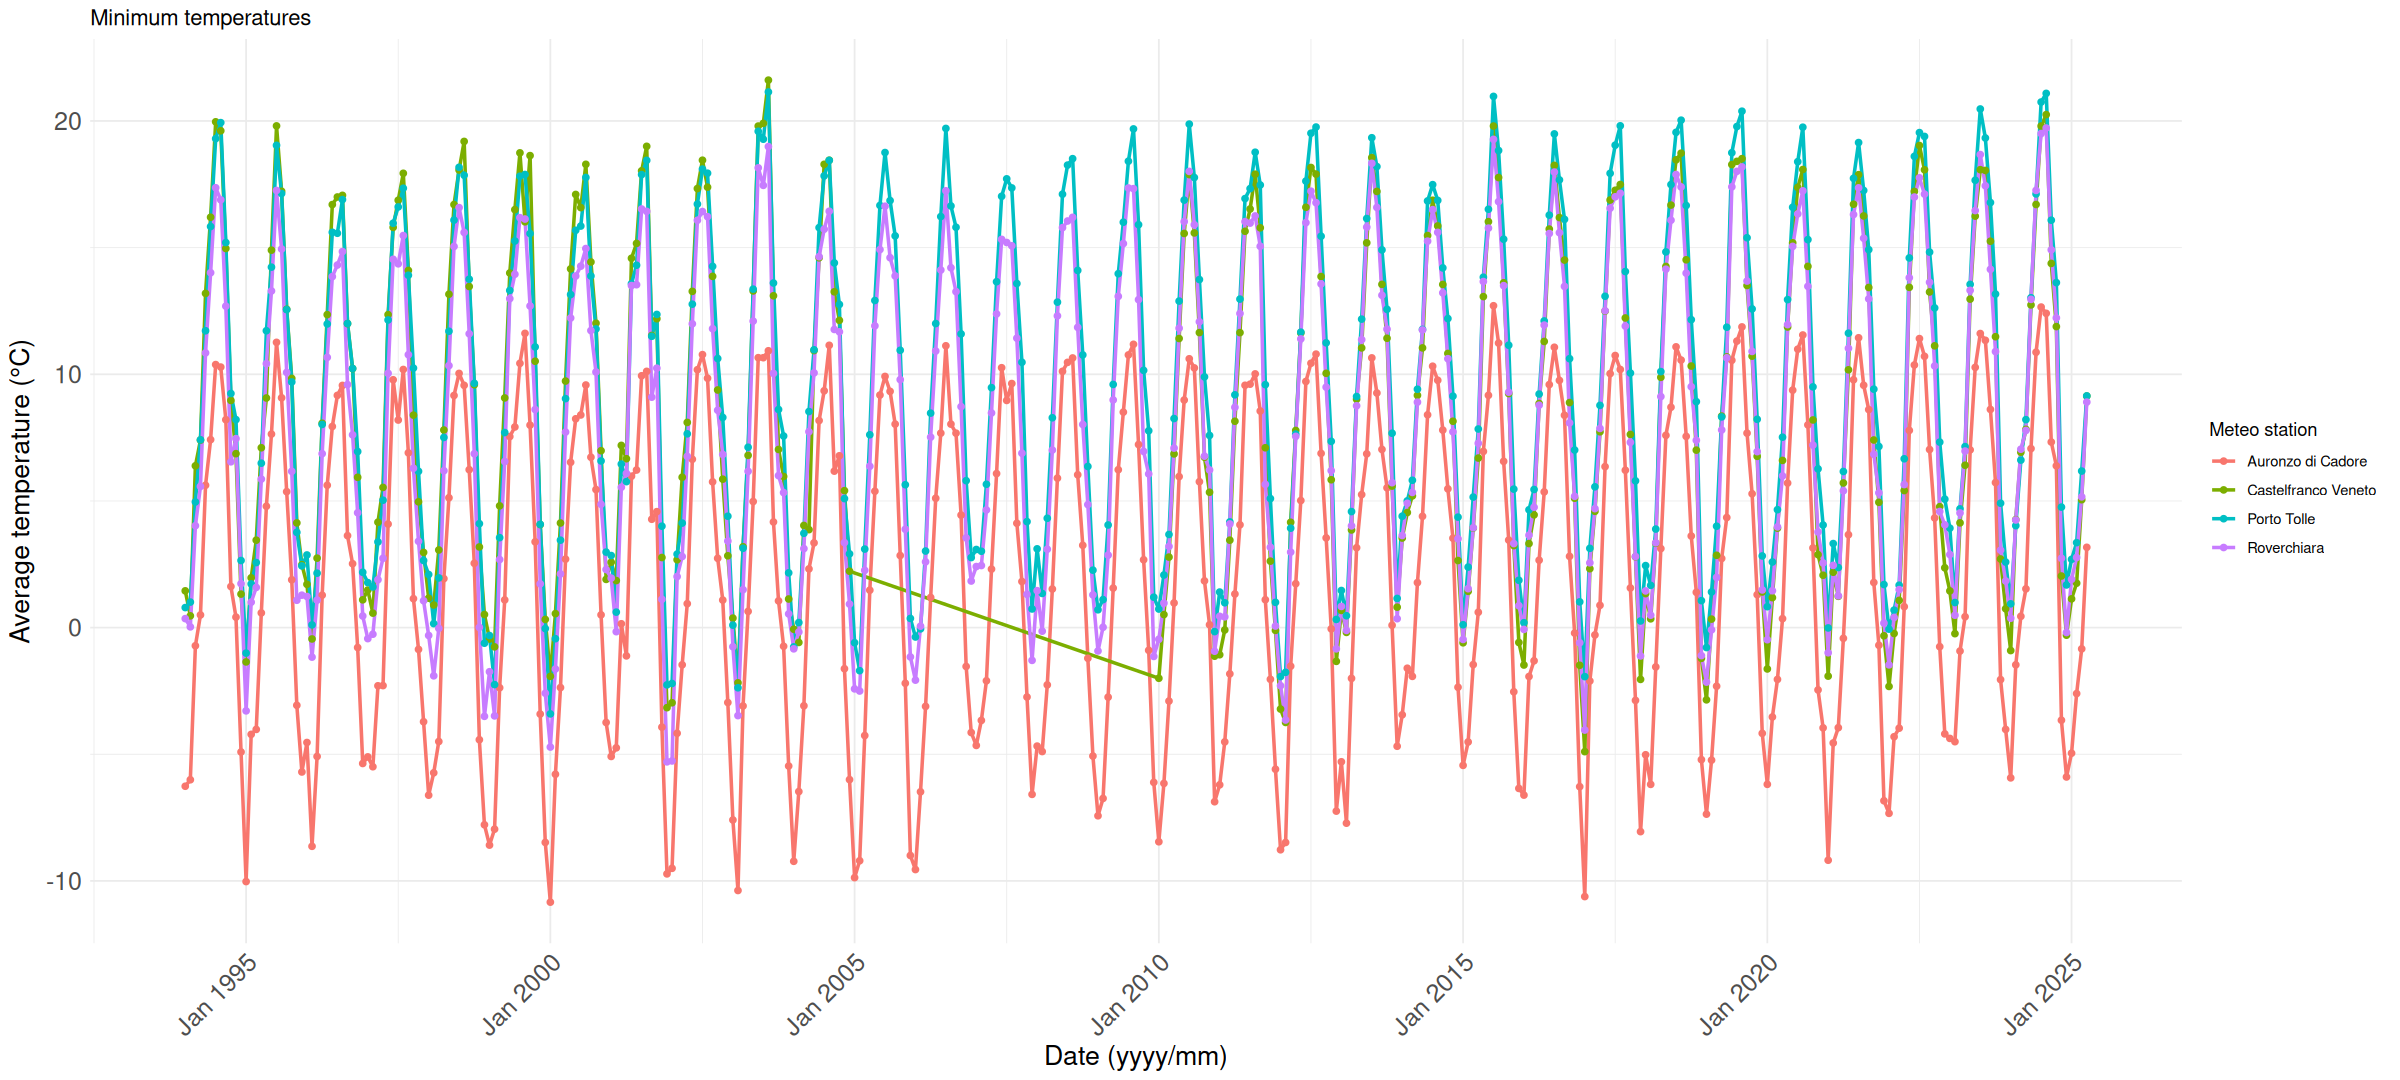

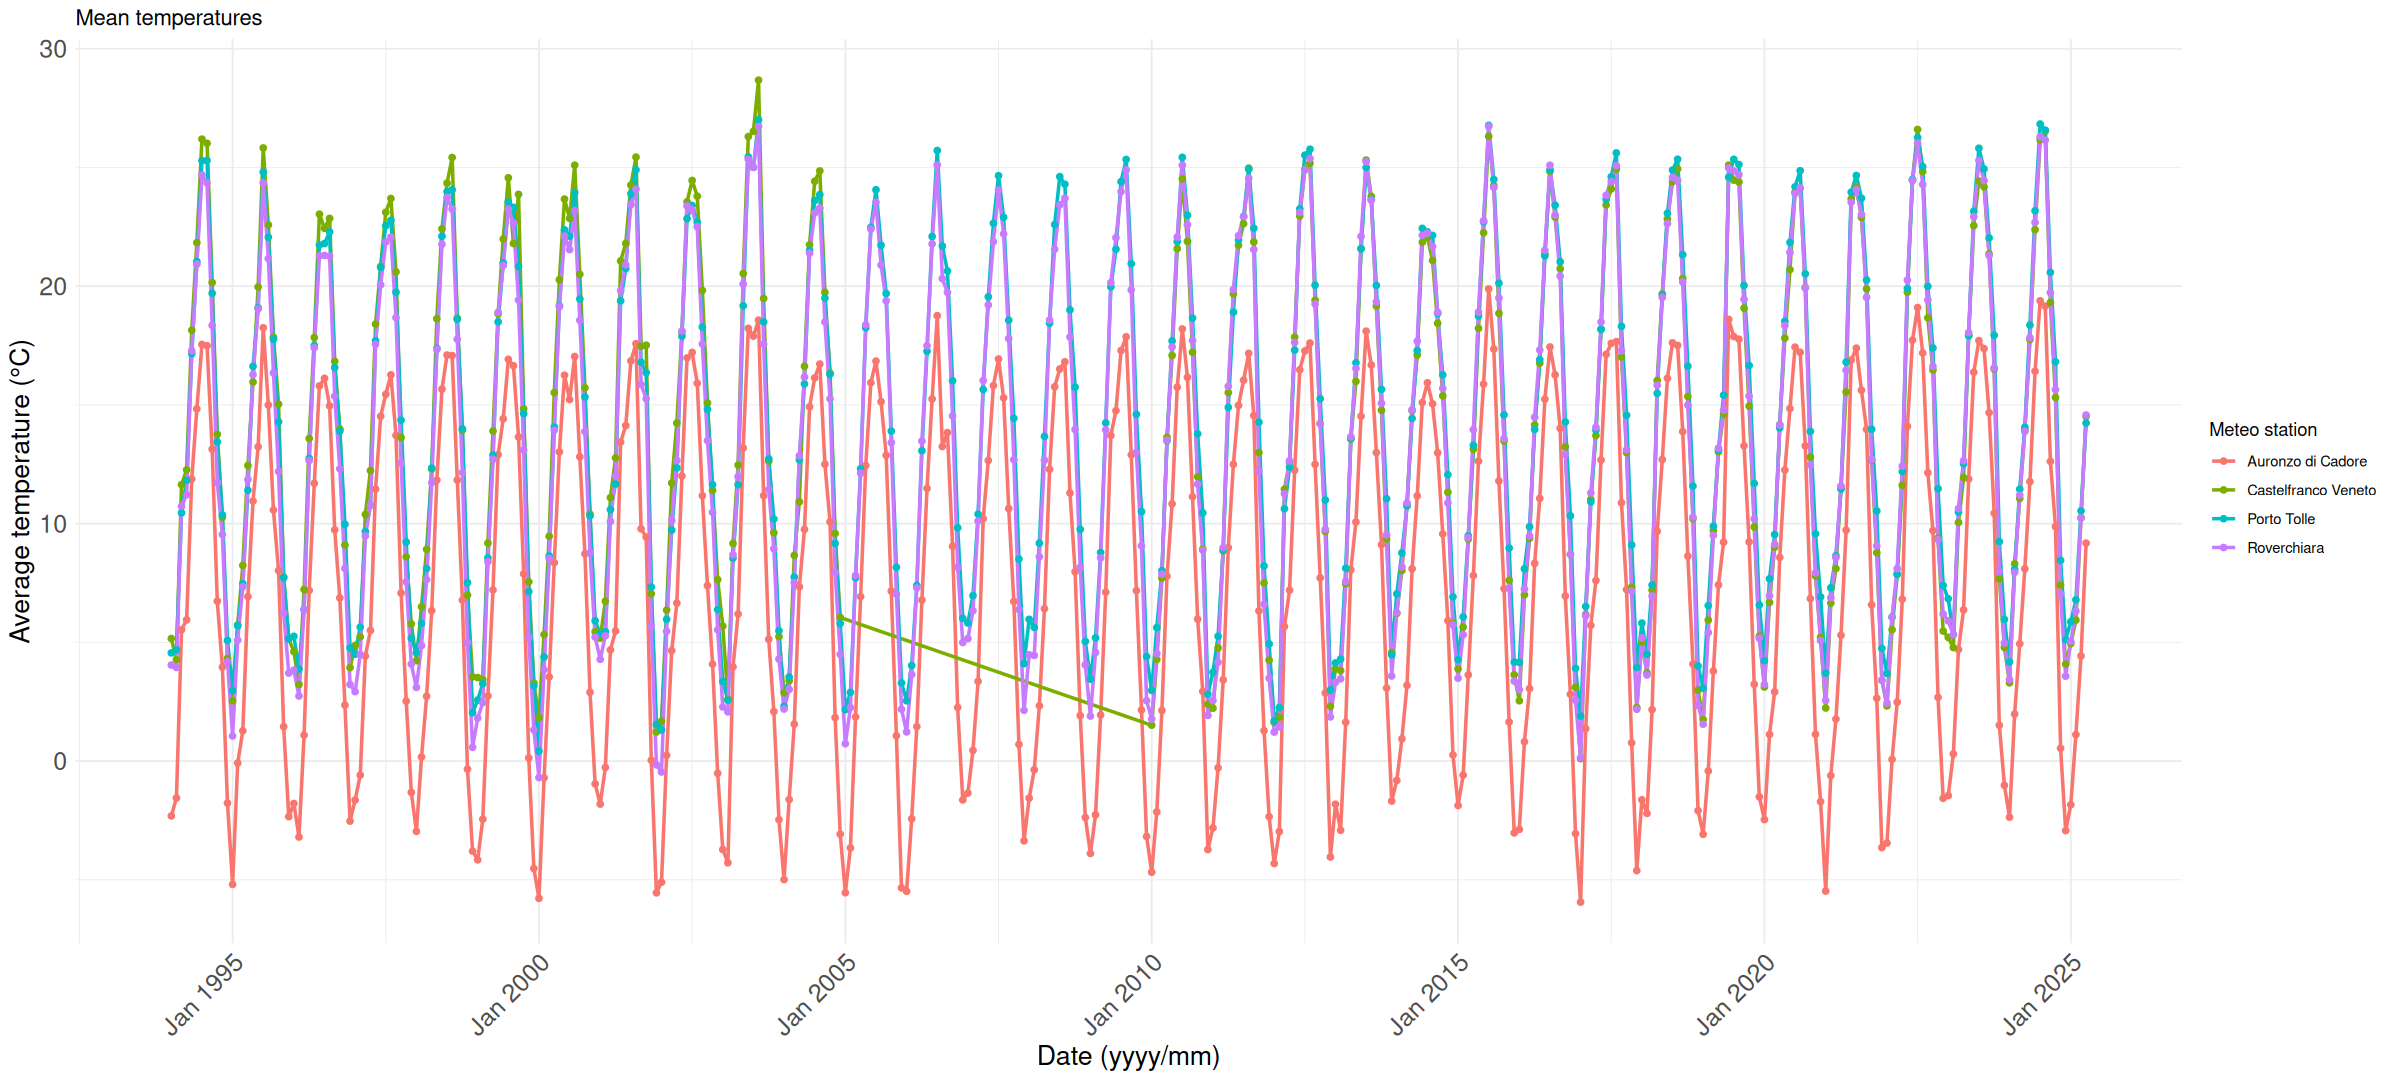

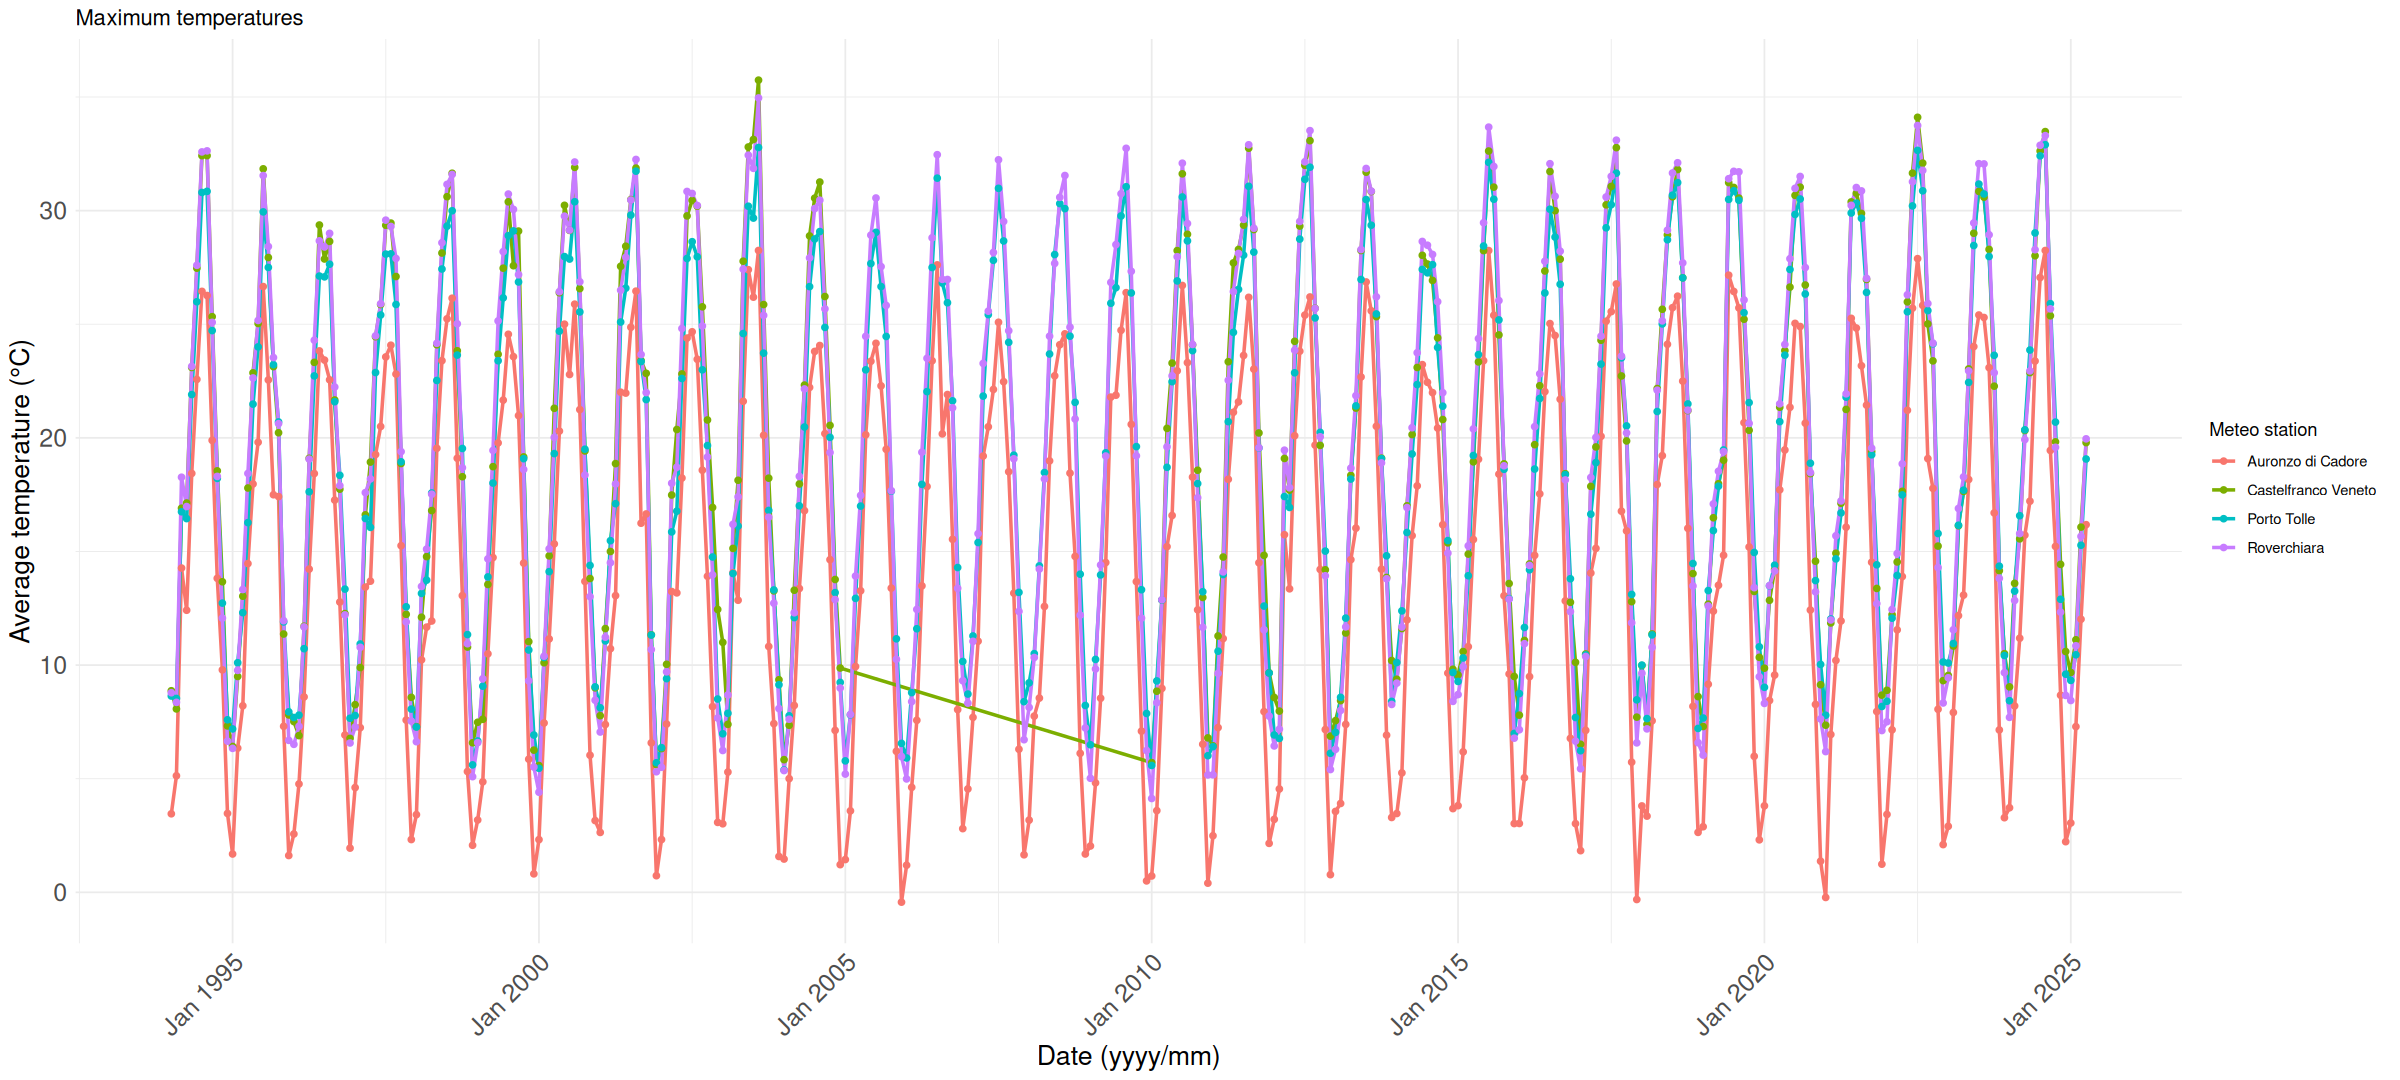

In [74]:
names_stat <- c("Auronzo" = "Auronzo di Cadore", "Castelfranco" = "Castelfranco Veneto",
  "PortoTolle" = "Porto Tolle","Roverchiara" = "Roverchiara")

plot_0<-function(df,y, title, cue, names){
    ggplot(df, aes(x = date, y = .data[[y]], color =  .data[[cue]])) +
      geom_line(linewidth = 1) +
      geom_point() +
      scale_color_discrete(labels = names) +
      labs(
        title = title,
        x = "Date (yyyy/mm)",
        y = "Average temperature (°C)",
        color = "Meteo station"
      ) +
      theme_minimal() +
      #scale_x_date(date_labels = "%Y",date_breaks = "12 months")+
      #scale_y_continuous(breaks=seq(-10,21,2))+
      theme(axis.text.x = element_text(angle = 45, hjust = 1, size=15),
            axis.text.y = element_text(size=15),
            axis.title.x=element_text(size=16),
            axis.title.y=element_text(size=16))#+
}
min_plot<-plot_0(df_mean_94,'TMIN_mean','Minimum temperatures','station',names_stat)
mean_plot<-plot_0(df_mean_94,'TMED_mean','Mean temperatures','station',names_stat)
max_plot<-plot_0(df_mean_94, 'TMAX_mean','Maximum temperatures','station',names_stat)
#grid.arrange(min_plot, mean_plot, max_plot, ncol=3, top = textGrob('Average annual temperature (1994-2022)', 
                #gp = gpar(fontsize = 22, fontface = "bold", col = "black")))
options(repr.plot.width = 20, repr.plot.height =9 ) 

min_plot
mean_plot
max_plot

## alternative plotting

In [76]:
df_long <- df_mean_94 %>%
  pivot_longer(
    cols = c(TMIN_mean, TMED_mean, TMAX_mean),
    names_to = "type",
    values_to = "temp"
  )
df_long

station     year month date     type      temp      
1    Auronzo     1994  1    Jan 1994 TMIN_mean -6.262461 
2    Auronzo     1994  1    Jan 1994 TMED_mean -2.309919 
3    Auronzo     1994  1    Jan 1994 TMAX_mean  3.456503 
4    Auronzo     1994  2    Feb 1994 TMIN_mean -6.007143 
5    Auronzo     1994  2    Feb 1994 TMED_mean -1.554832 
6    Auronzo     1994  2    Feb 1994 TMAX_mean  5.128571 
7    Auronzo     1994  3    Mar 1994 TMIN_mean -0.716129 
8    Auronzo     1994  3    Mar 1994 TMED_mean  5.529810 
9    Auronzo     1994  3    Mar 1994 TMAX_mean 14.270968 
10   Auronzo     1994  4    Apr 1994 TMIN_mean  0.500000 
11   Auronzo     1994  4    Apr 1994 TMED_mean  5.949313 
12   Auronzo     1994  4    Apr 1994 TMAX_mean 12.413333 
13   Auronzo     1994  5    May 1994 TMIN_mean  5.619355 
14   Auronzo     1994  5    May 1994 TMED_mean 11.881345 
15   Auronzo     1994  5    May 1994 TMAX_mean 18.435484 
16   Auronzo     1994  6    Jun 1994 TMIN_mean  7.420000 
17   Auronzo     1994  6    Jun 1994 TMED_mean 14.831637 
18   Auronzo     1994  6    Jun 1994 TMAX_mean 22.573333 
19   Auronzo     1994  7    Jul 1994 TMIN_mean 10.383677 
20   Auronzo     1994  7    Jul 1994 TMED_mean 17.546126 
21   Auronzo     1994  7    Jul 1994 TMAX_mean 26.446681 
22   Auronzo     1994  8    Aug 1994 TMIN_mean 10.285742 
23   Auronzo     1994  8    Aug 1994 TMED_mean 17.493897 
24   Auronzo     1994  8    Aug 1994 TMAX_mean 26.264629 
25   Auronzo     1994  9    Sep 1994 TMIN_mean  8.206667 
26   Auronzo     1994  9    Sep 1994 TMED_mean 13.138443 
27   Auronzo     1994  9    Sep 1994 TMAX_mean 19.890000 
28   Auronzo     1994 10    Oct 1994 TMIN_mean  1.622581 
29   Auronzo     1994 10    Oct 1994 TMED_mean  6.734687 
30   Auronzo     1994 10    Oct 1994 TMAX_mean 13.819355 
⋮    ⋮           ⋮    ⋮     ⋮        ⋮         ⋮         
4303 Roverchiara 2024  7    Jul 2024 TMIN_mean 19.5032258
4304 Roverchiara 2024  7    Jul 2024 TMED_mean 26.2935484
4305 Roverchiara 2024  7    Jul 2024 TMAX_mean 32.8741935
4306 Roverchiara 2024  8    Aug 2024 TMIN_mean 19.7225806
4307 Roverchiara 2024  8    Aug 2024 TMED_mean 26.1483871
4308 Roverchiara 2024  8    Aug 2024 TMAX_mean 33.3000000
4309 Roverchiara 2024  9    Sep 2024 TMIN_mean 14.9133333
4310 Roverchiara 2024  9    Sep 2024 TMED_mean 19.7300000
4311 Roverchiara 2024  9    Sep 2024 TMAX_mean 25.6766667
4312 Roverchiara 2024 10    Oct 2024 TMIN_mean 12.2258065
4313 Roverchiara 2024 10    Oct 2024 TMED_mean 15.6451613
4314 Roverchiara 2024 10    Oct 2024 TMAX_mean 19.5838710
4315 Roverchiara 2024 11    Nov 2024 TMIN_mean  2.7366667
4316 Roverchiara 2024 11    Nov 2024 TMED_mean  7.0400000
4317 Roverchiara 2024 11    Nov 2024 TMAX_mean 12.3300000
4318 Roverchiara 2024 12    Dec 2024 TMIN_mean -0.1935484
4319 Roverchiara 2024 12    Dec 2024 TMED_mean  3.5741935
4320 Roverchiara 2024 12    Dec 2024 TMAX_mean  8.6645161
4321 Roverchiara 2025  1    Jan 2025 TMIN_mean  1.9064516
4322 Roverchiara 2025  1    Jan 2025 TMED_mean  5.0387097
4323 Roverchiara 2025  1    Jan 2025 TMAX_mean  8.4419355
4324 Roverchiara 2025  2    Feb 2025 TMIN_mean  2.7678571
4325 Roverchiara 2025  2    Feb 2025 TMED_mean  6.3107143
4326 Roverchiara 2025  2    Feb 2025 TMAX_mean 10.8500000
4327 Roverchiara 2025  3    Mar 2025 TMIN_mean  5.1612903
4328 Roverchiara 2025  3    Mar 2025 TMED_mean 10.2354839
4329 Roverchiara 2025  3    Mar 2025 TMAX_mean 15.6645161
4330 Roverchiara 2025  4    Apr 2025 TMIN_mean  8.9033333
4331 Roverchiara 2025  4    Apr 2025 TMED_mean 14.5733333
4332 Roverchiara 2025  4    Apr 2025 TMAX_mean 19.9566667

In [80]:
adc_plot<-plot_0(df_long[df_long$station == 'Auronzo', ],'temp', 'Auronzo','type',c('Min', 'Mean', 'Max.'))
cv_plot<-plot_0(df_long[df_long$station == 'Castelfranco', ],'temp', 'Castelfranco Veneto','type',c('Min', 'Mean', 'Max.'))
pt_plot<-plot_0(df_long[df_long$station == 'PortoTolle', ],'temp', 'Porto Tolle','type',c('Min', 'Mean', 'Max.'))
rov_plot<-plot_0(df_long[df_long$station == 'Roverchiara', ],'temp', 'Roverchiara','type',c('Min', 'Mean', 'Max.'))

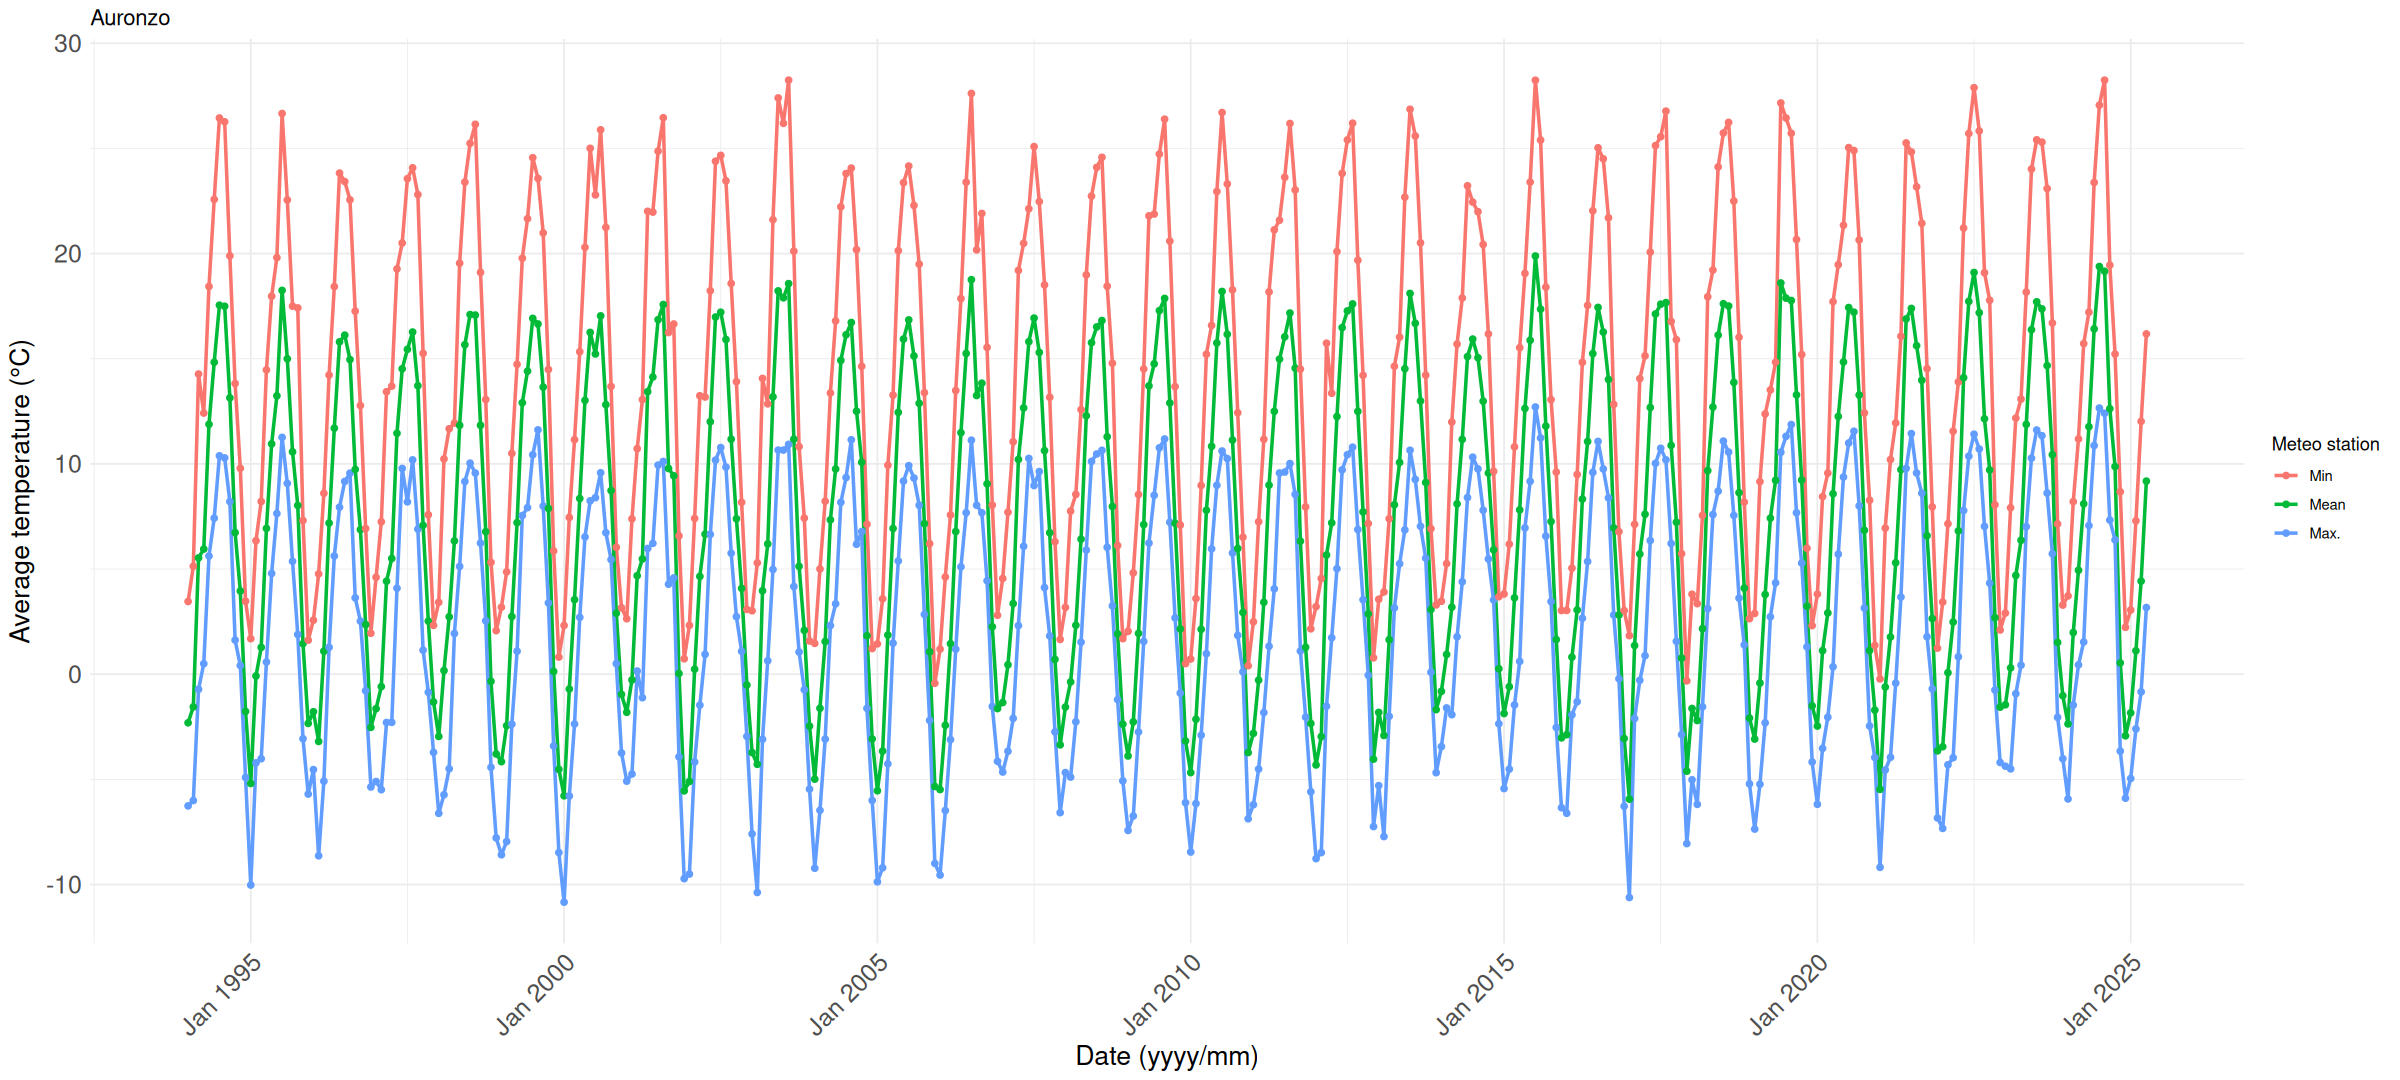

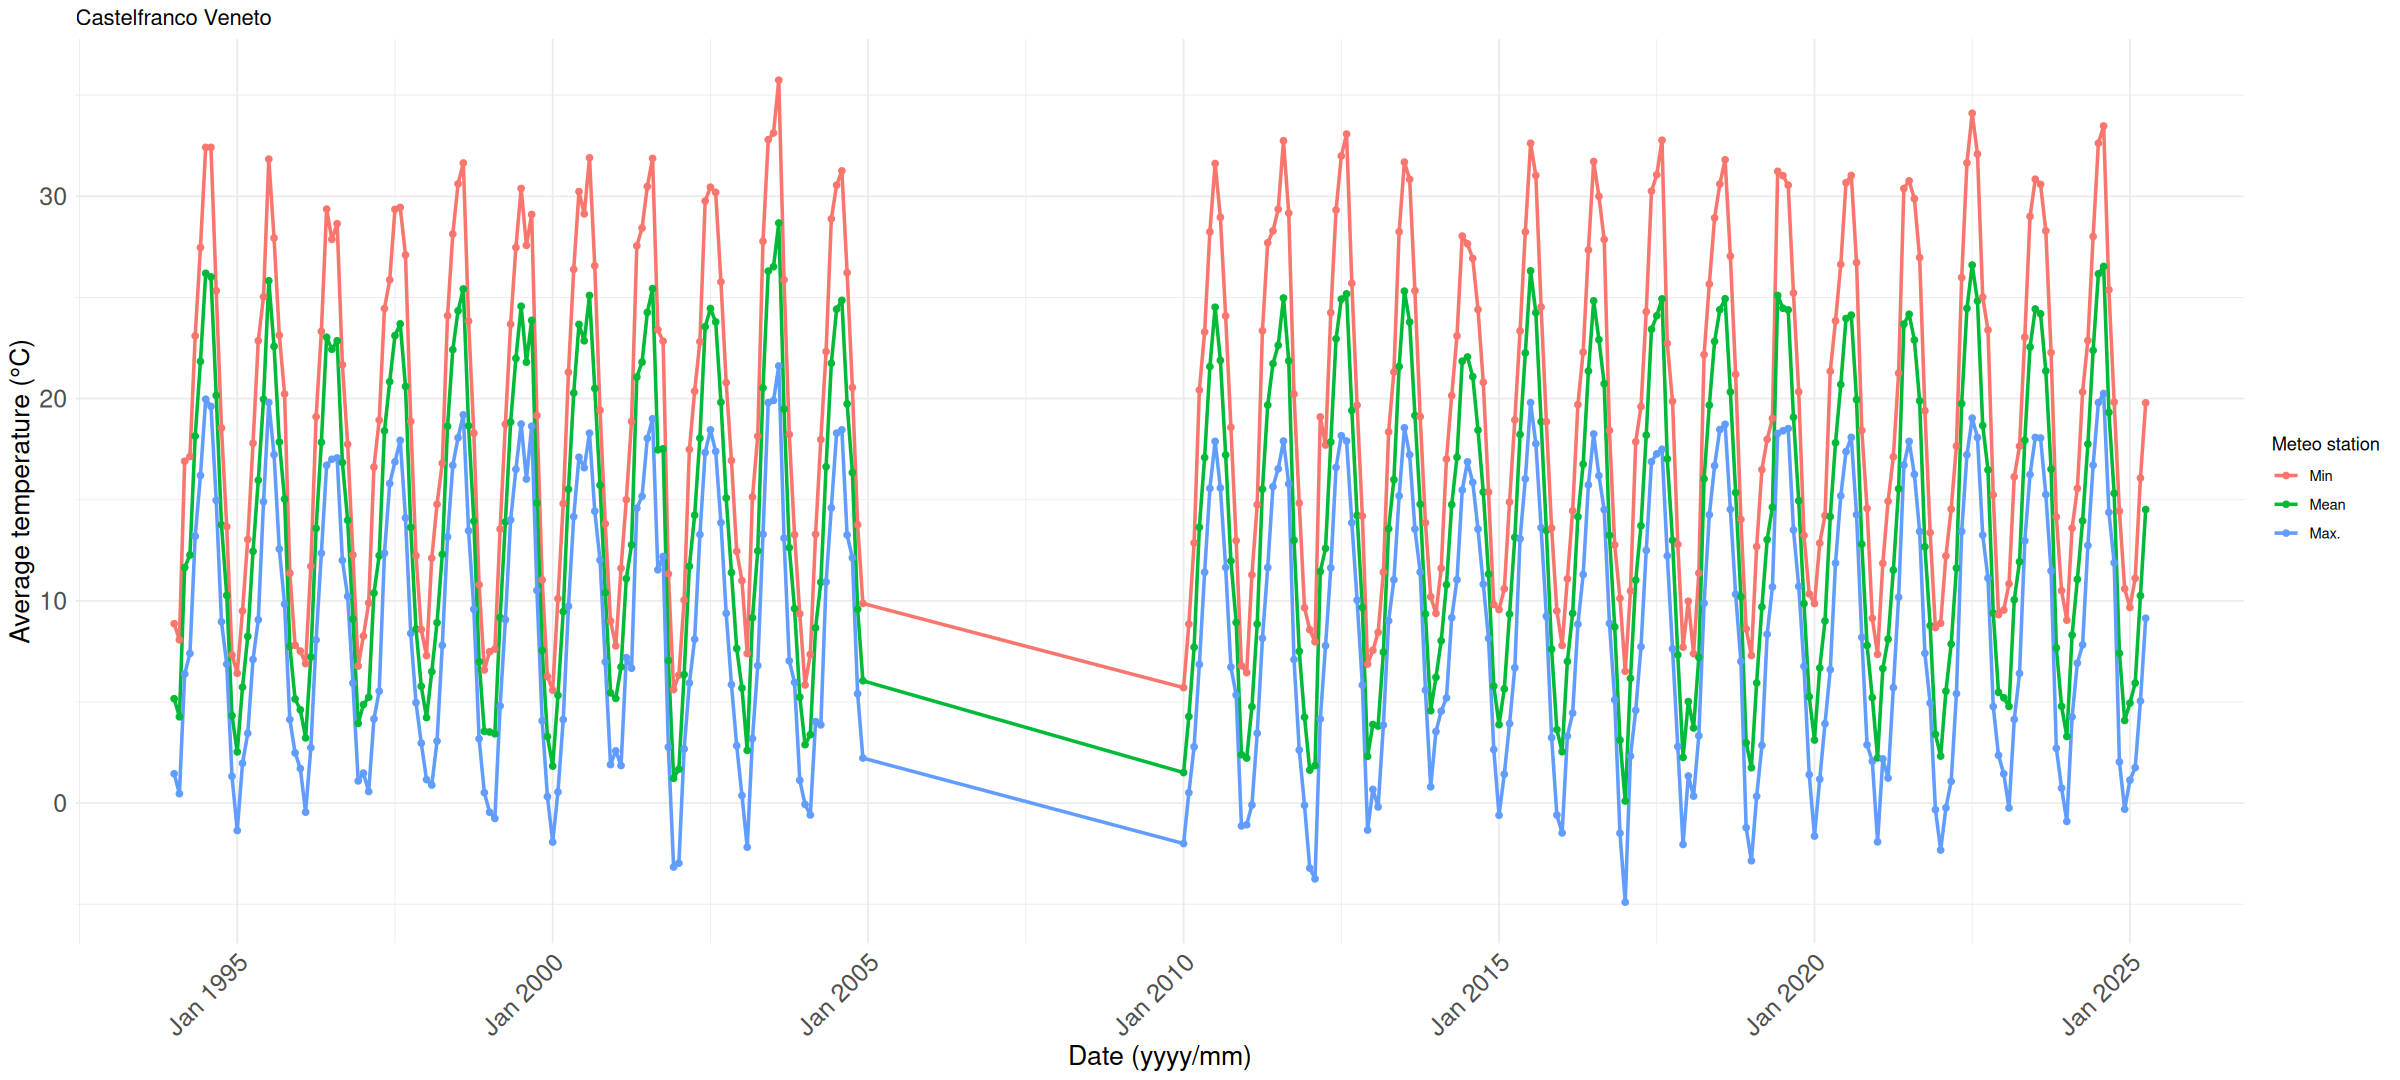

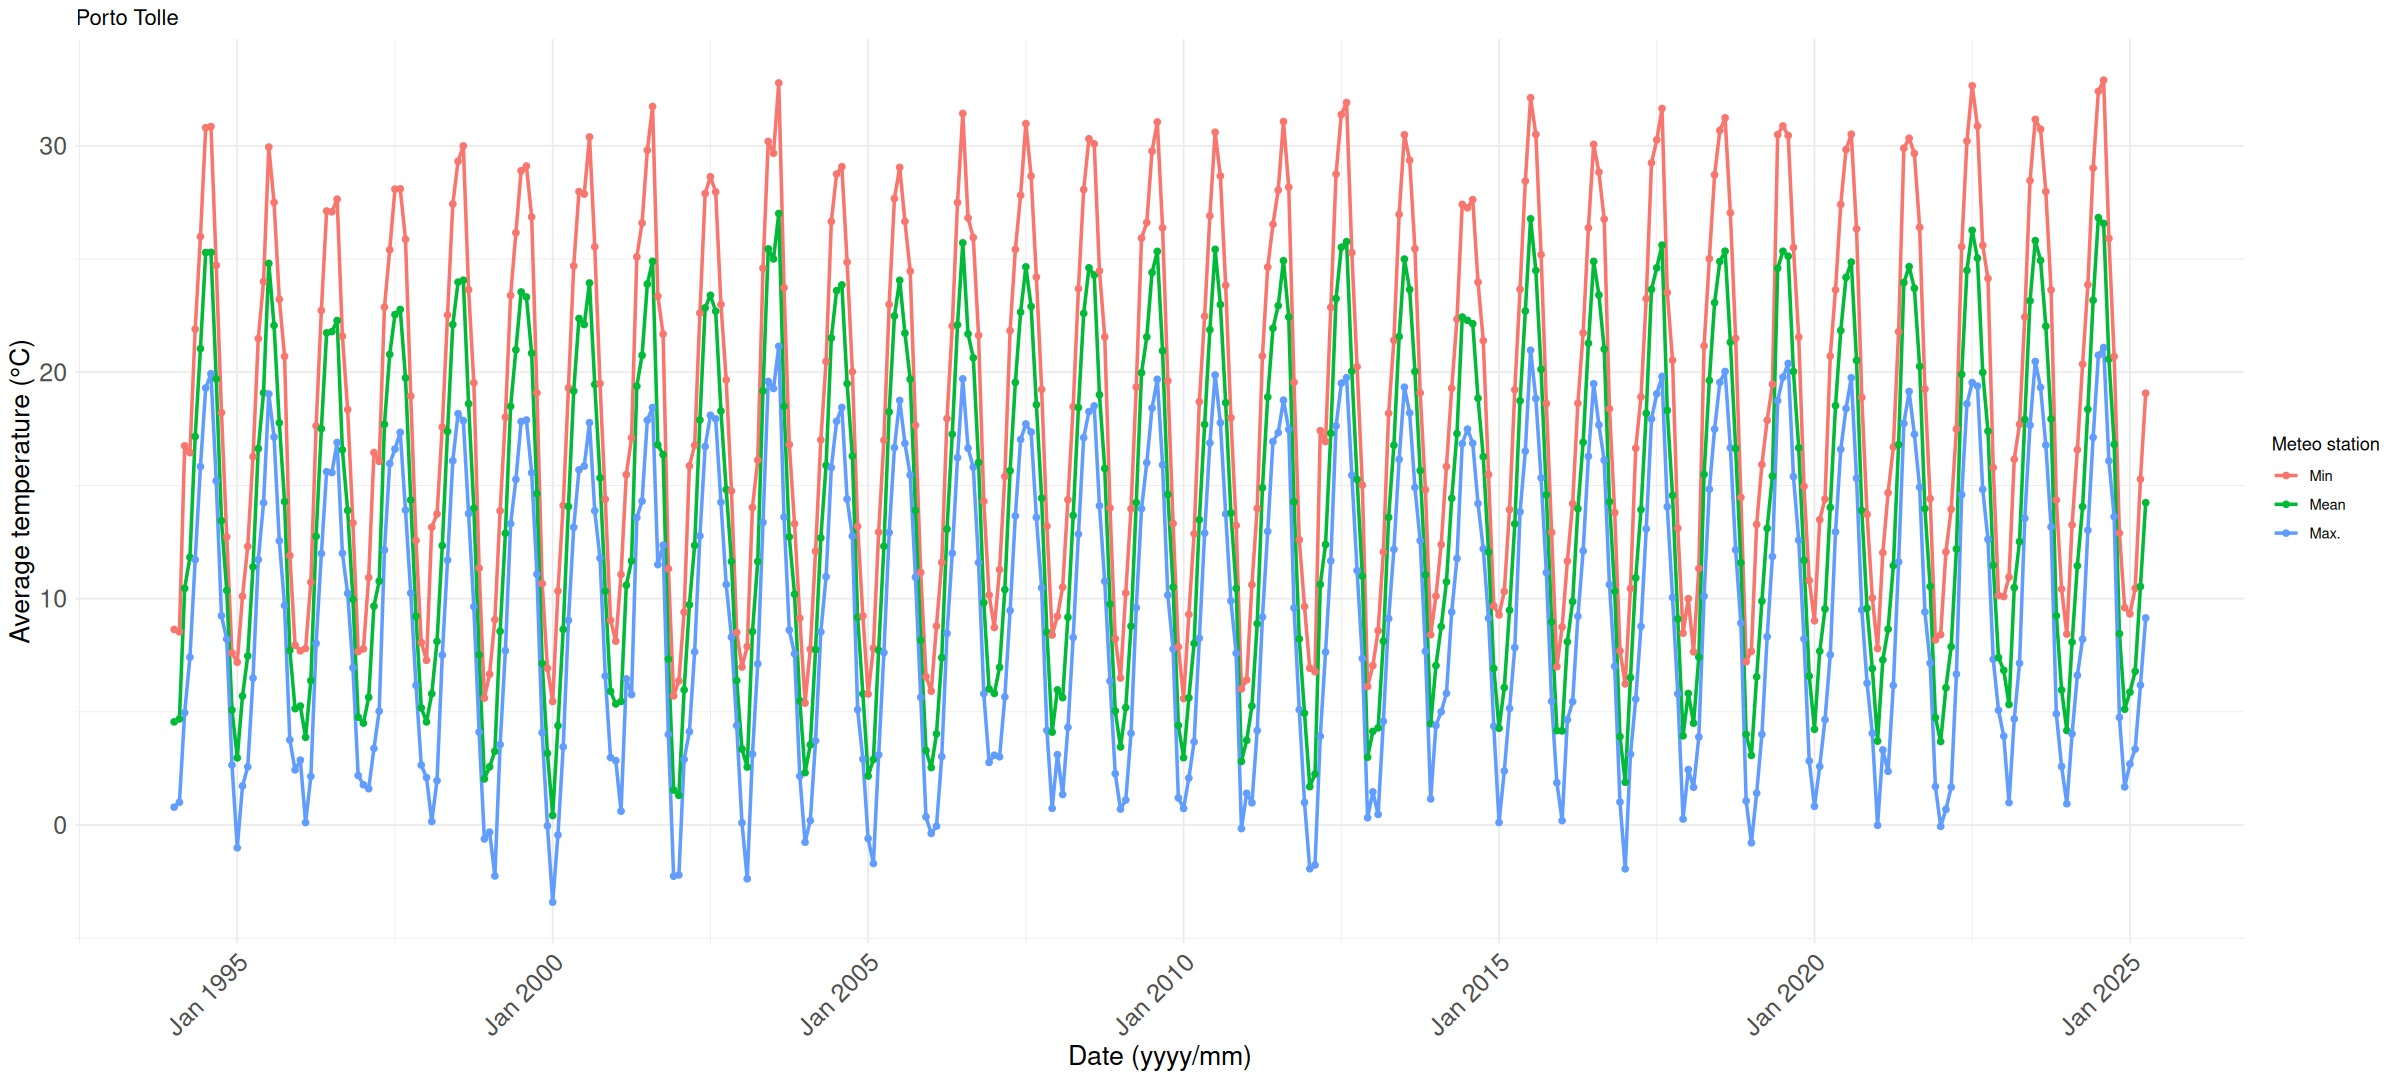

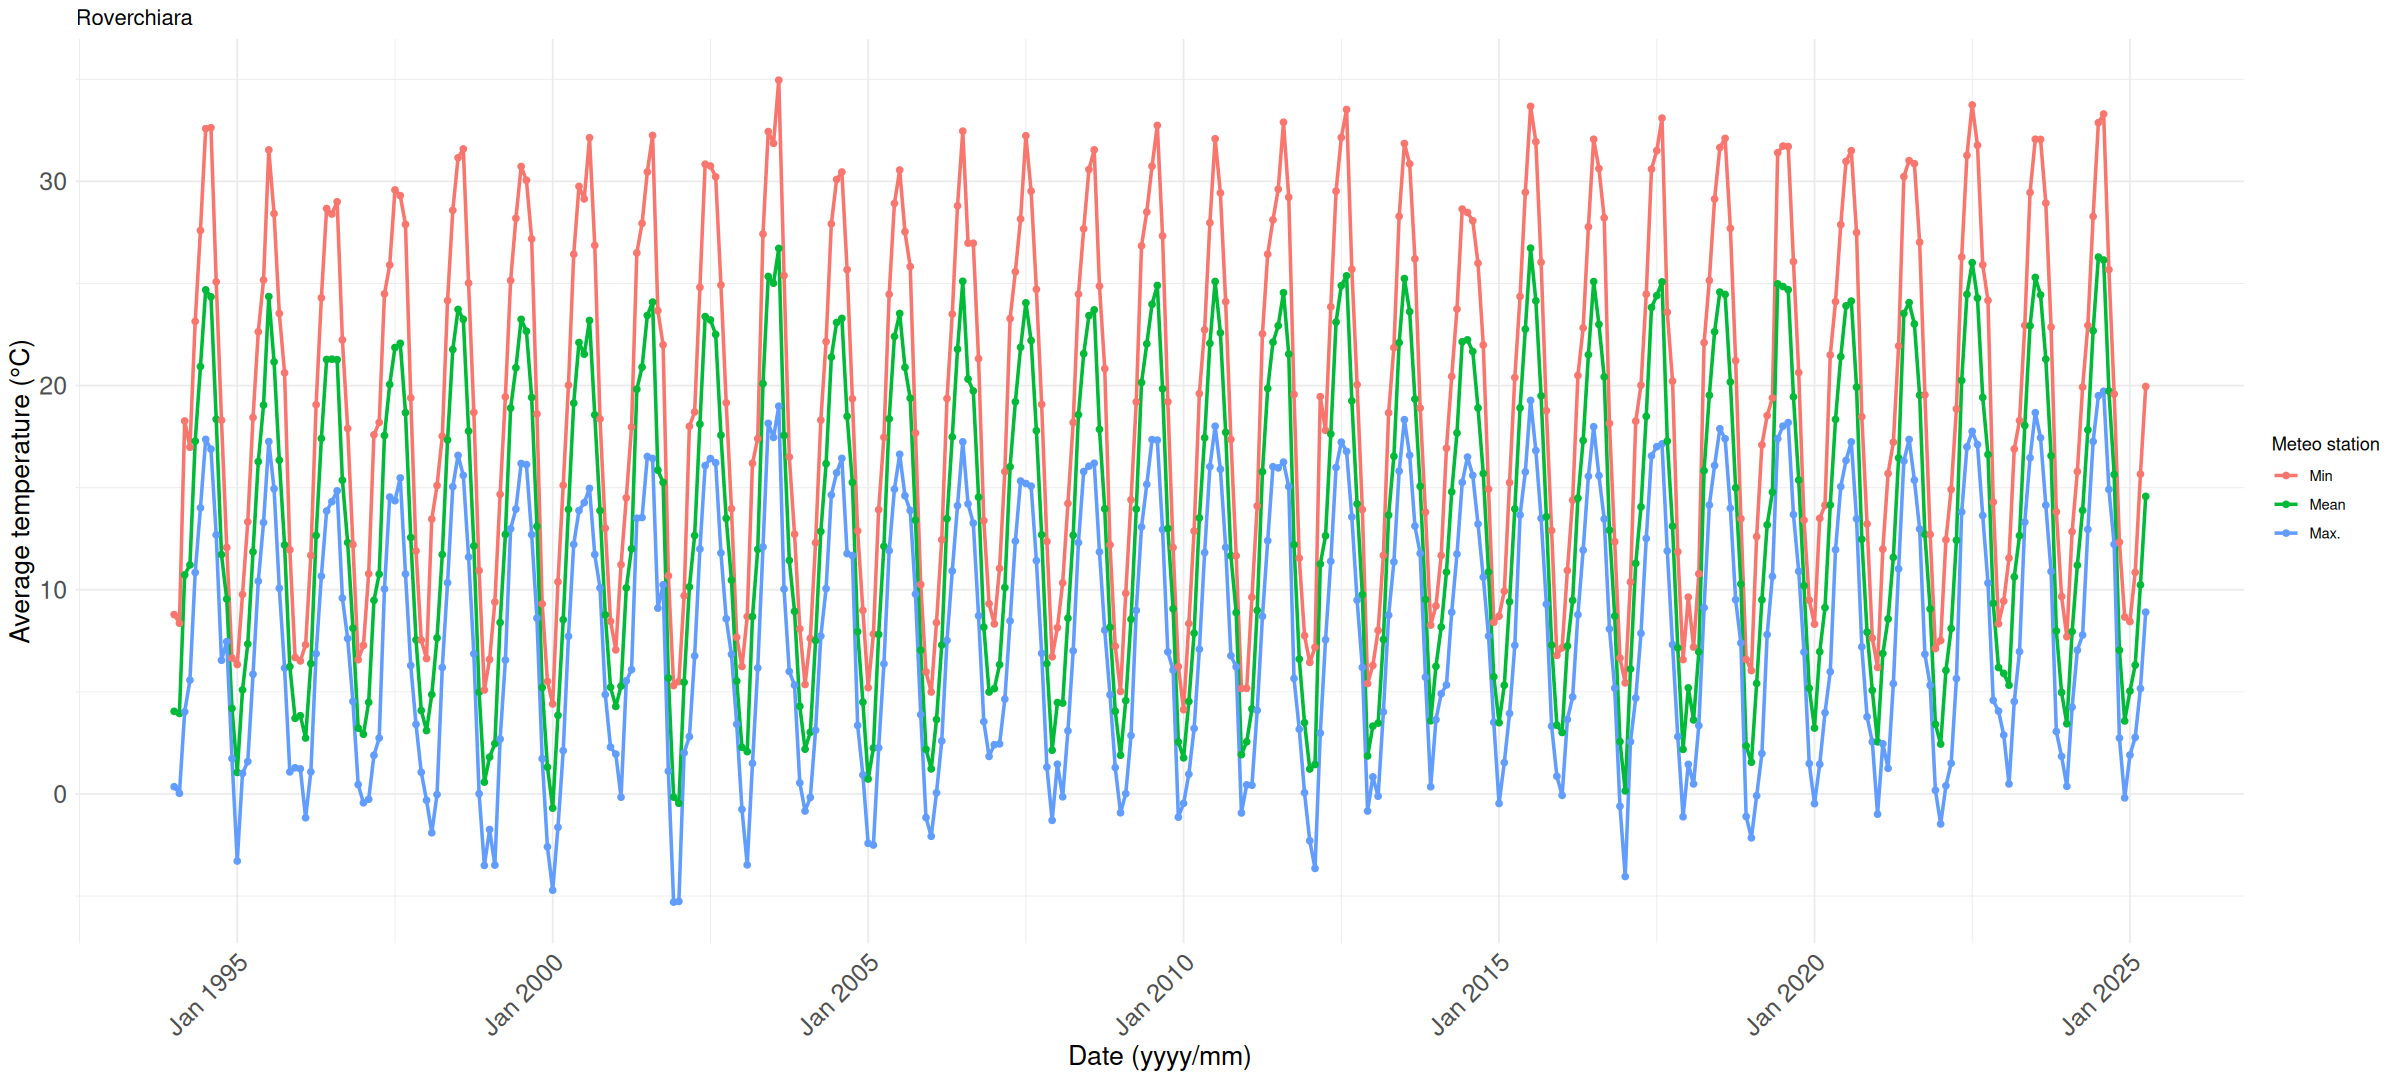

In [82]:
#options(repr.plot.width = 20, repr.plot.height = 12) 
#
#grid.arrange(adc_plot, cv_plot, pt_plot, rov_plot, ncol=2,nrow=2, top = textGrob('Evolution over time of the min., max. and average temperatures', 
#                gp = gpar(fontsize = 22, fontface = "bold", col = "black")))


options(repr.plot.width = 20, repr.plot.height =9 ) 
adc_plot
cv_plot
pt_plot
rov_plot

# Part 0) VECCHIA


## Annual graphs

In [56]:
df_min <- df_anni %>% 
  filter(tipo == "min")
df_max <- df_anni %>% 
  filter(tipo == "max")
df_mean <- df_anni %>% 
  filter(tipo == "mean")
df_min

ERROR: Error: object 'df_anni' not found


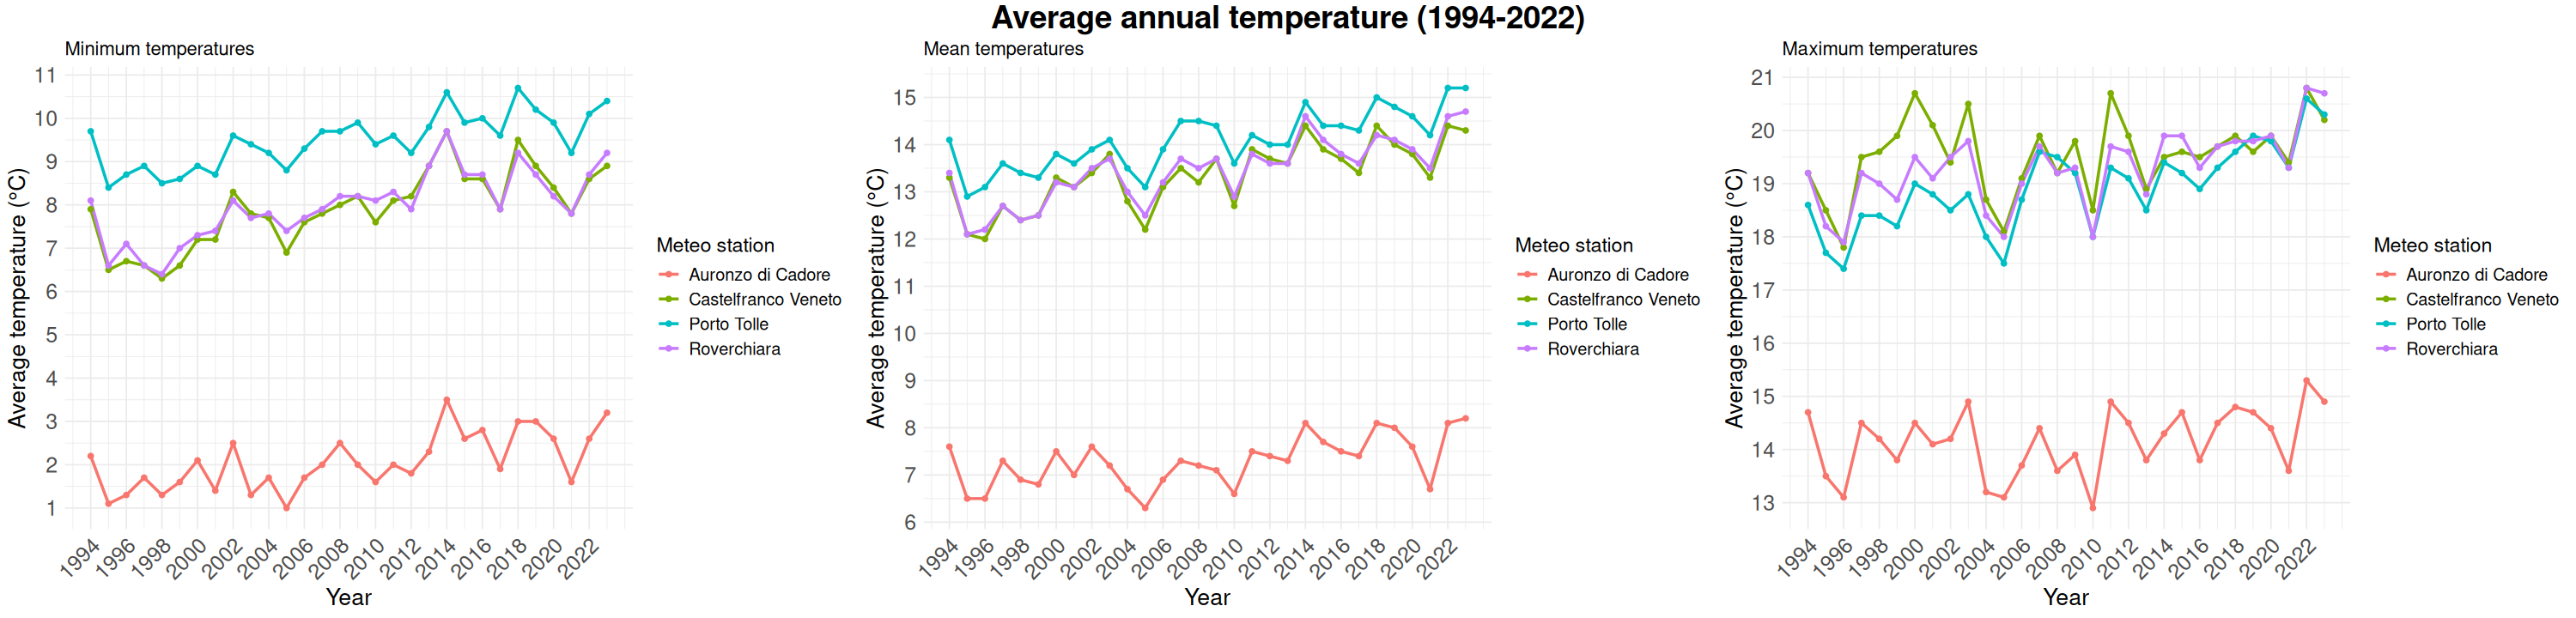

In [7]:

names_stat <- c("Auronzo" = "Auronzo di Cadore", "Castelfranco" = "Castelfranco Veneto",
  "PortoTolle" = "Porto Tolle","Roverchiara" = "Roverchiara")

plot_0<-function(df, title, names){
    ggplot(df, aes(x = Anno, y = Medio, color = paese)) +
      geom_line(linewidth = 1) +
      geom_point() +
      scale_color_discrete(labels = names_stat) +
      labs(
        title = title,
        x = "Year",
        y = "Average temperature (°C)",
        color = "Meteo station"
      ) +
      theme_minimal() +
      scale_x_continuous(breaks=seq(1994,2022,2))+
      scale_y_continuous(breaks=seq(0,21,1))+
      theme(axis.text.x = element_text(angle = 45, hjust = 1, size=15),
            axis.text.y = element_text(size=15),
            axis.title.x=element_text(size=16),
            axis.title.y=element_text(size=16))+
      theme(legend.position.inside = c(0.8,0.47), legend.title=element_text(size=14), legend.text=element_text(size=12))
}
options(repr.plot.width = 25, repr.plot.height = 6) 
min_plot<-plot_0(df_min,'Minimum temperatures',names_stat)
mean_plot<-plot_0(df_mean,'Mean temperatures',names_stat)
max_plot<-plot_0(df_max, 'Maximum temperatures',names_stat)
grid.arrange(min_plot, mean_plot, max_plot, ncol=3, top = textGrob('Average annual temperature (1994-2022)', 
                gp = gpar(fontsize = 22, fontface = "bold", col = "black")))

## Monthly graphs

In [63]:
setwd("/home/samu/AdvStats/Project/Data")
files <- list.files(pattern = "\\.xlsx?$", full.names = TRUE)

process_file <- function(file_path) {
  file_name <- tools::file_path_sans_ext(basename(file_path))
  parts <- str_split(file_name, "_")[[1]]
  tipo <- parts[length(parts)]
  paese <- paste(parts[-length(parts)], collapse = "_")

  df <- read_excel(file_path, skip = 6)
  df <- df %>% filter(!is.na(Anno))
  metadata <- read_excel(file_path, n_max = 6 - 2, col_names = FALSE)

  df$paese<-paese
  df$tipo <- tipo

  return(df)
}

df_list <- lapply(files, process_file)
df_finale <- bind_rows(df_list)

cat("nrow:", nrow(df_finale), "\n")
cat("Pesi:", unique(df_finale$paese), "\n")
cat("Tipi:", unique(df_finale$tipo), "\n")
cat("Anni:", unique(df_finale$Anno), "\n") ### !!! 'Medio mensile' è considerato un anno, toglibile se da problemi


df_anni <- df_finale %>% 
  filter(Anno != "Medio mensile") %>%
  mutate(Anno = as.numeric(Anno),Medio = as.numeric(Medio))
     

New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`


nrow: 372 
Pesi: Auronzo Castelfranco PortoTolle Roverchiara 
Tipi: max mean min 
Anni: 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 Medio mensile 


In [64]:
df_long <- df_anni %>%
  pivot_longer(
    cols = GEN:DIC,
    names_to = "mese",
    values_to = "temperatura")%>%
    mutate(mese = factor(mese, levels = c("GEN", "FEB", "MAR", "APR", "MAG", "GIU", 
                                       "LUG", "AGO", "SET", "OTT", "NOV", "DIC")))%>%
    mutate(data = make_date(Anno, mese, 1))
unique(df_long$paese)

[1] "Auronzo"      "Castelfranco" "PortoTolle"   "Roverchiara"

In [65]:
df_min <- df_long %>% 
    filter(tipo == "min")#%>%
    #mutate(data = make_date(Anno, mese, 1))
df_max <- df_long %>% 
    filter(tipo == "max")#%>%
    #mutate(data = make_date(Anno, mese, 1))
df_mean <- df_long %>% 
    filter(tipo == "mean")#%>%
    #mutate(data = make_date(Anno, mese, 1))
df_mean

Anno Medio paese       tipo mese temperatura data      
1    1994 7.6   Auronzo     mean GEN  -2.2        1994-01-01
2    1994 7.6   Auronzo     mean FEB  -1.6        1994-02-01
3    1994 7.6   Auronzo     mean MAR   5.5        1994-03-01
4    1994 7.6   Auronzo     mean APR   5.9        1994-04-01
5    1994 7.6   Auronzo     mean MAG  11.9        1994-05-01
6    1994 7.6   Auronzo     mean GIU  14.8        1994-06-01
7    1994 7.6   Auronzo     mean LUG  17.5        1994-07-01
8    1994 7.6   Auronzo     mean AGO  17.5        1994-08-01
9    1994 7.6   Auronzo     mean SET  13.1        1994-09-01
10   1994 7.6   Auronzo     mean OTT   6.7        1994-10-01
11   1994 7.6   Auronzo     mean NOV   4.0        1994-11-01
12   1994 7.6   Auronzo     mean DIC  -1.8        1994-12-01
13   1995 6.5   Auronzo     mean GEN  -5.2        1995-01-01
14   1995 6.5   Auronzo     mean FEB  -0.1        1995-02-01
15   1995 6.5   Auronzo     mean MAR   1.3        1995-03-01
16   1995 6.5   Auronzo     mean APR   6.9        1995-04-01
17   1995 6.5   Auronzo     mean MAG  11.0        1995-05-01
18   1995 6.5   Auronzo     mean GIU  13.2        1995-06-01
19   1995 6.5   Auronzo     mean LUG  18.2        1995-07-01
20   1995 6.5   Auronzo     mean AGO  15.0        1995-08-01
21   1995 6.5   Auronzo     mean SET  10.6        1995-09-01
22   1995 6.5   Auronzo     mean OTT   8.0        1995-10-01
23   1995 6.5   Auronzo     mean NOV   1.5        1995-11-01
24   1995 6.5   Auronzo     mean DIC  -2.3        1995-12-01
25   1996 6.5   Auronzo     mean GEN  -1.8        1996-01-01
26   1996 6.5   Auronzo     mean FEB  -3.3        1996-02-01
27   1996 6.5   Auronzo     mean MAR   1.1        1996-03-01
28   1996 6.5   Auronzo     mean APR   7.2        1996-04-01
29   1996 6.5   Auronzo     mean MAG  11.7        1996-05-01
30   1996 6.5   Auronzo     mean GIU  15.8        1996-06-01
⋮    ⋮    ⋮     ⋮           ⋮    ⋮    ⋮           ⋮         
1411 2021 13.5  Roverchiara mean LUG  24.1        2021-07-01
1412 2021 13.5  Roverchiara mean AGO  23.0        2021-08-01
1413 2021 13.5  Roverchiara mean SET  19.5        2021-09-01
1414 2021 13.5  Roverchiara mean OTT  12.7        2021-10-01
1415 2021 13.5  Roverchiara mean NOV   9.1        2021-11-01
1416 2021 13.5  Roverchiara mean DIC   3.4        2021-12-01
1417 2022 14.6  Roverchiara mean GEN   2.4        2022-01-01
1418 2022 14.6  Roverchiara mean FEB   6.1        2022-02-01
1419 2022 14.6  Roverchiara mean MAR   8.1        2022-03-01
1420 2022 14.6  Roverchiara mean APR  12.4        2022-04-01
1421 2022 14.6  Roverchiara mean MAG  20.3        2022-05-01
1422 2022 14.6  Roverchiara mean GIU  24.5        2022-06-01
1423 2022 14.6  Roverchiara mean LUG  26.0        2022-07-01
1424 2022 14.6  Roverchiara mean AGO  24.3        2022-08-01
1425 2022 14.6  Roverchiara mean SET  19.4        2022-09-01
1426 2022 14.6  Roverchiara mean OTT  16.6        2022-10-01
1427 2022 14.6  Roverchiara mean NOV   9.3        2022-11-01
1428 2022 14.6  Roverchiara mean DIC   6.2        2022-12-01
1429 2023 14.7  Roverchiara mean GEN   5.9        2023-01-01
1430 2023 14.7  Roverchiara mean FEB   5.3        2023-02-01
1431 2023 14.7  Roverchiara mean MAR  10.6        2023-03-01
1432 2023 14.7  Roverchiara mean APR  12.6        2023-04-01
1433 2023 14.7  Roverchiara mean MAG  18.0        2023-05-01
1434 2023 14.7  Roverchiara mean GIU  22.9        2023-06-01
1435 2023 14.7  Roverchiara mean LUG  25.3        2023-07-01
1436 2023 14.7  Roverchiara mean AGO  24.4        2023-08-01
1437 2023 14.7  Roverchiara mean SET  21.3        2023-09-01
1438 2023 14.7  Roverchiara mean OTT  16.6        2023-10-01
1439 2023 14.7  Roverchiara mean NOV   8.0        2023-11-01
1440 2023 14.7  Roverchiara mean DIC   5.0        2023-12-01

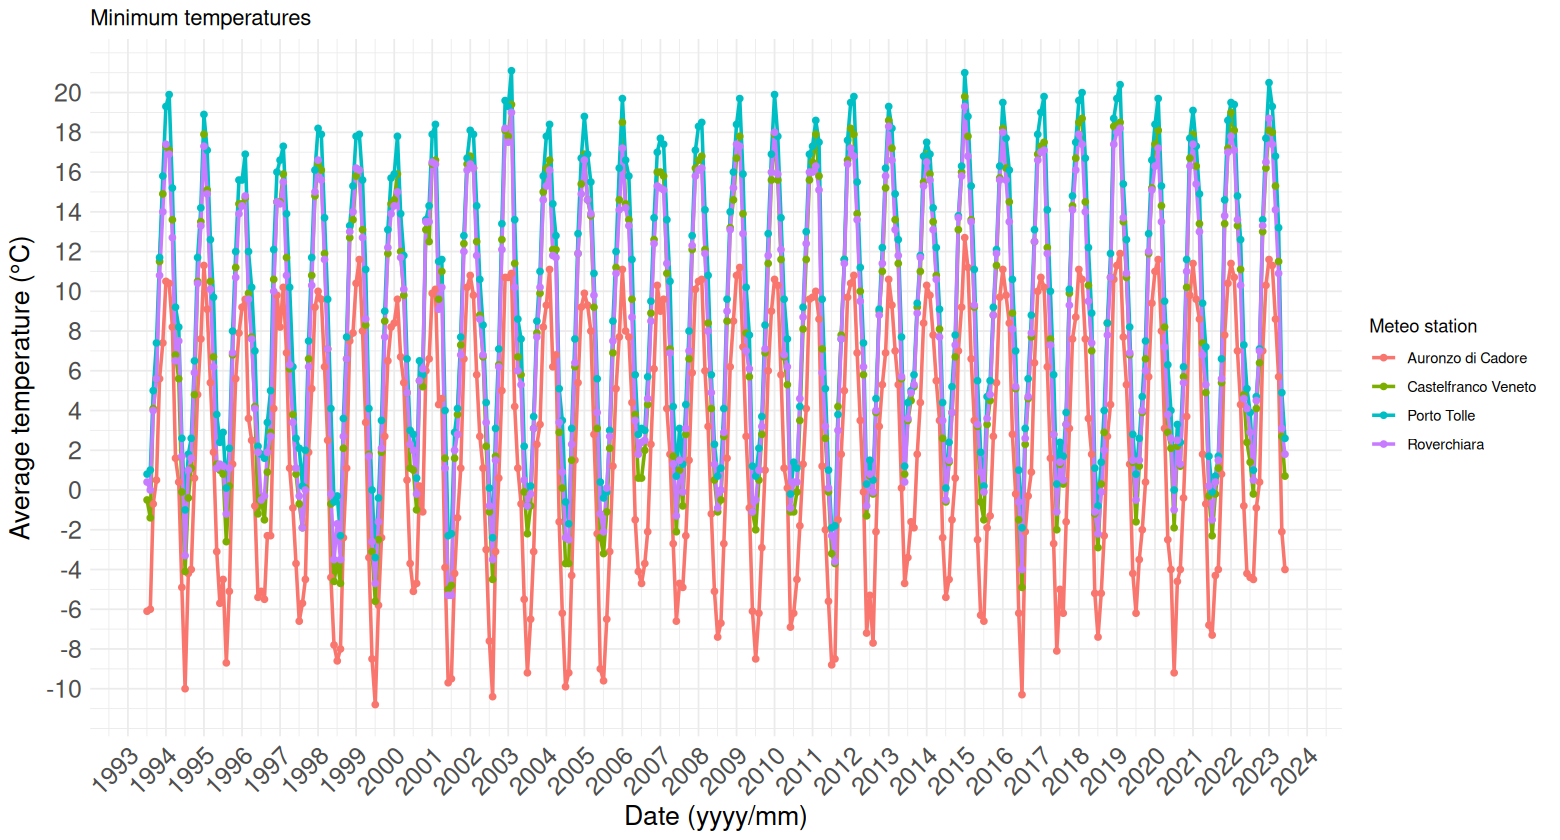

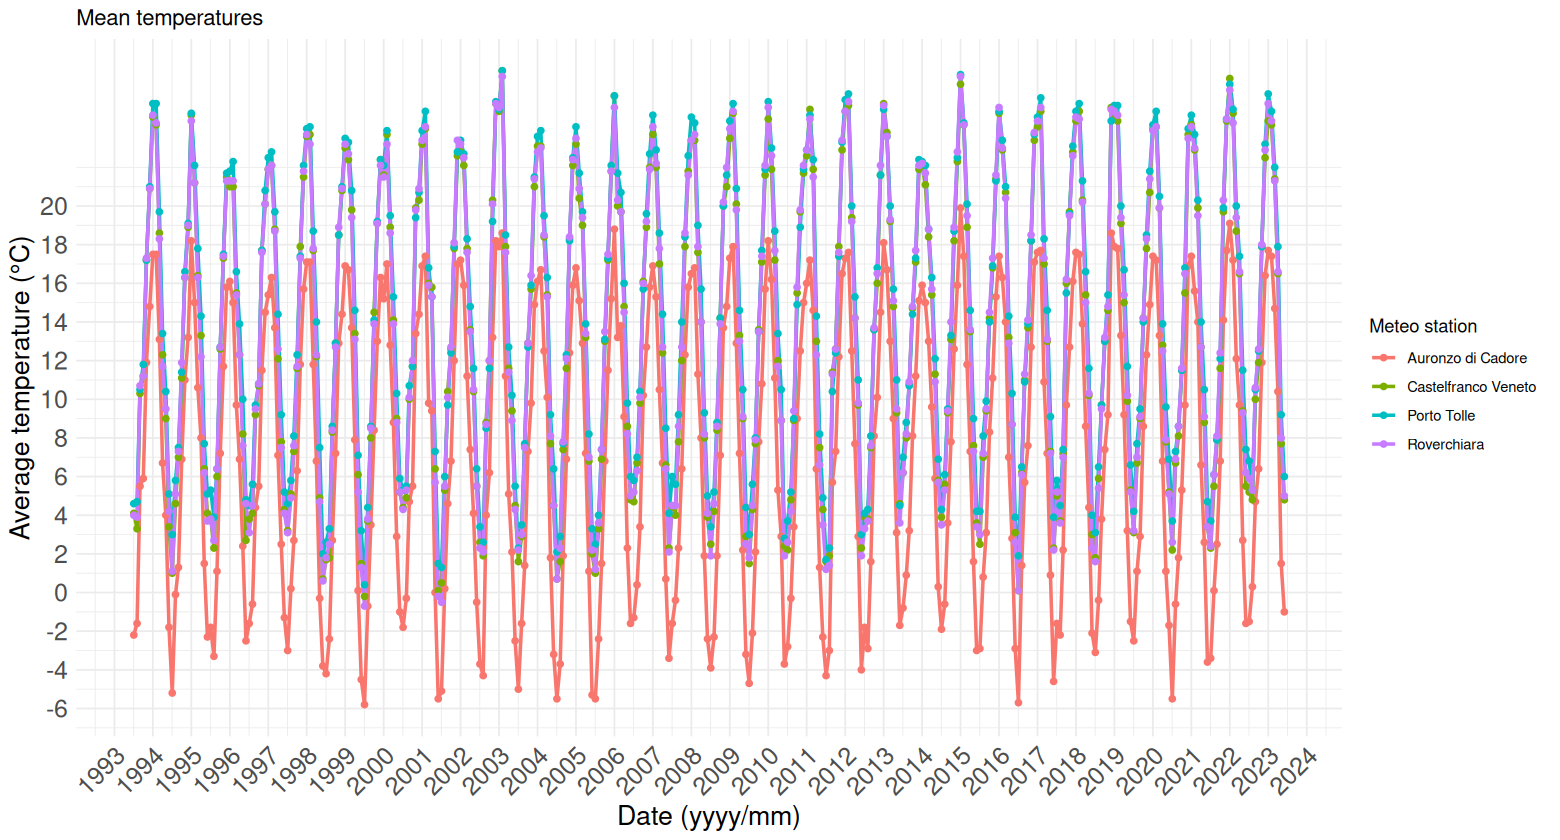

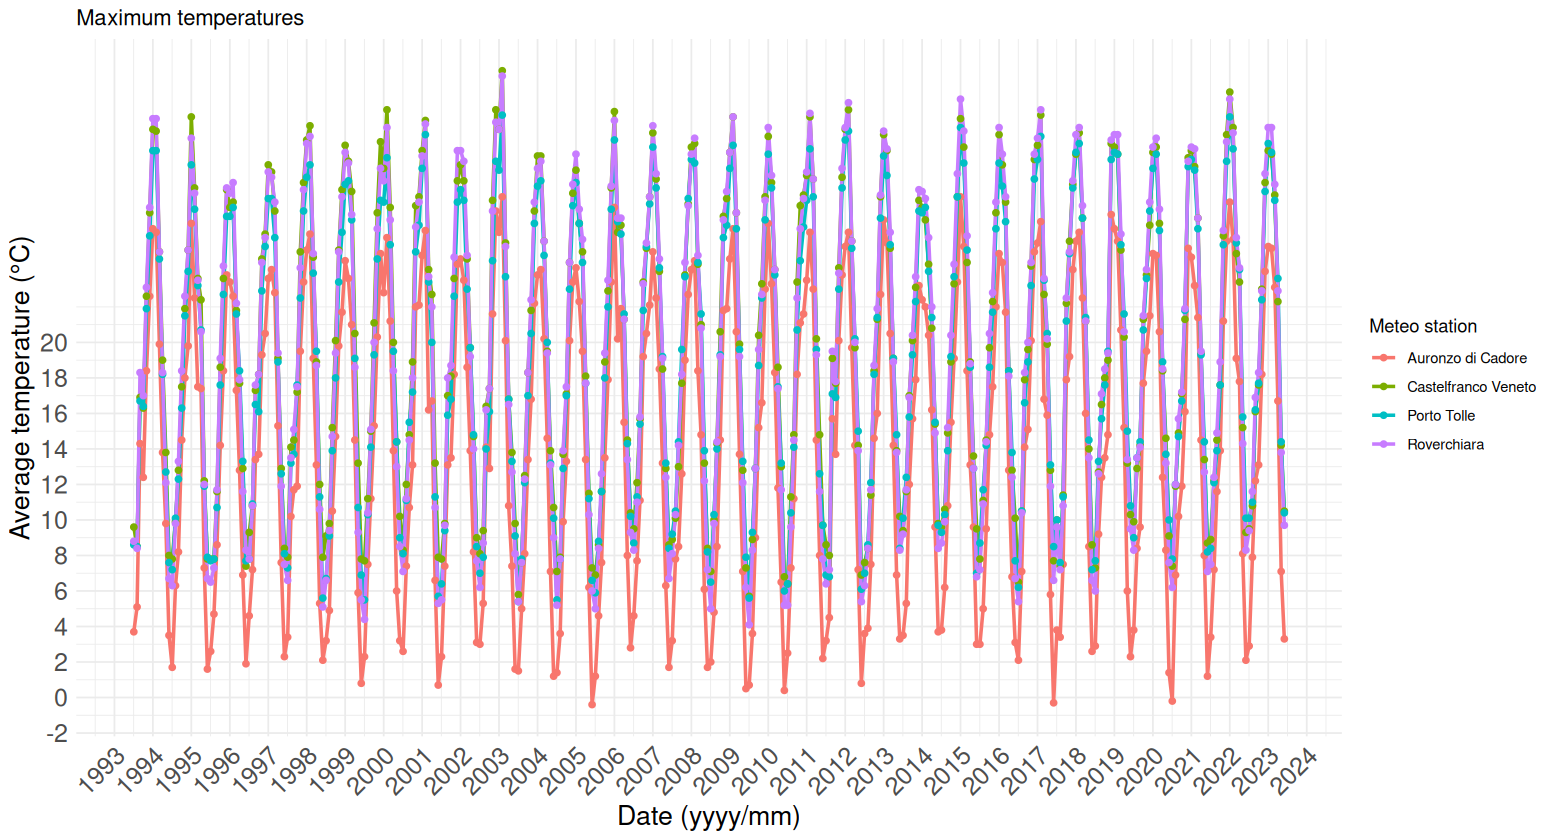

In [66]:
names_stat <- c("Auronzo" = "Auronzo di Cadore", "Castelfranco" = "Castelfranco Veneto",
  "PortoTolle" = "Porto Tolle","Roverchiara" = "Roverchiara")

plot_0<-function(df, title, cue, names){
    ggplot(df, aes(x = data, y = temperatura, color =  .data[[cue]])) +
      geom_line(linewidth = 1) +
      geom_point() +
      scale_color_discrete(labels = names) +
      labs(
        title = title,
        x = "Date (yyyy/mm)",
        y = "Average temperature (°C)",
        color = "Meteo station"
      ) +
      theme_minimal() +
      scale_x_date(date_labels = "%Y",date_breaks = "12 months")+
      scale_y_continuous(breaks=seq(-10,21,2))+
      theme(axis.text.x = element_text(angle = 45, hjust = 1, size=15),
            axis.text.y = element_text(size=15),
            axis.title.x=element_text(size=16),
            axis.title.y=element_text(size=16))#+
      #theme(legend.position = c(0.8,0.47), legend.title=element_text(size=14), legend.text=element_text(size=12))
}
options(repr.plot.width = 13, repr.plot.height = 7) 
min_plot<-plot_0(df_min,'Minimum temperatures','paese',names_stat)
mean_plot<-plot_0(df_mean,'Mean temperatures','paese',names_stat)
max_plot<-plot_0(df_max, 'Maximum temperatures','paese',names_stat)
#grid.arrange(min_plot, mean_plot, max_plot, ncol=3, top = textGrob('Average annual temperature (1994-2022)', 
                #gp = gpar(fontsize = 22, fontface = "bold", col = "black")))
min_plot
mean_plot
max_plot

## Alternative clearer representation (by town not by type)

In [67]:
adc_plot<-plot_0(df_long[df_long$paese == 'Auronzo', ], 'Auronzo','tipo',c('Min', 'Mean', 'Max.'))
cv_plot<-plot_0(df_long[df_long$paese == 'Castelfranco', ], 'Castelfranco Veneto','tipo',c('Min', 'Mean', 'Max.'))
pt_plot<-plot_0(df_long[df_long$paese == 'PortoTolle', ], 'Porto Tolle','tipo',c('Min', 'Mean', 'Max.'))
rov_plot<-plot_0(df_long[df_long$paese == 'Roverchiara', ], 'Roverchiara','tipo',c('Min', 'Mean', 'Max.'))

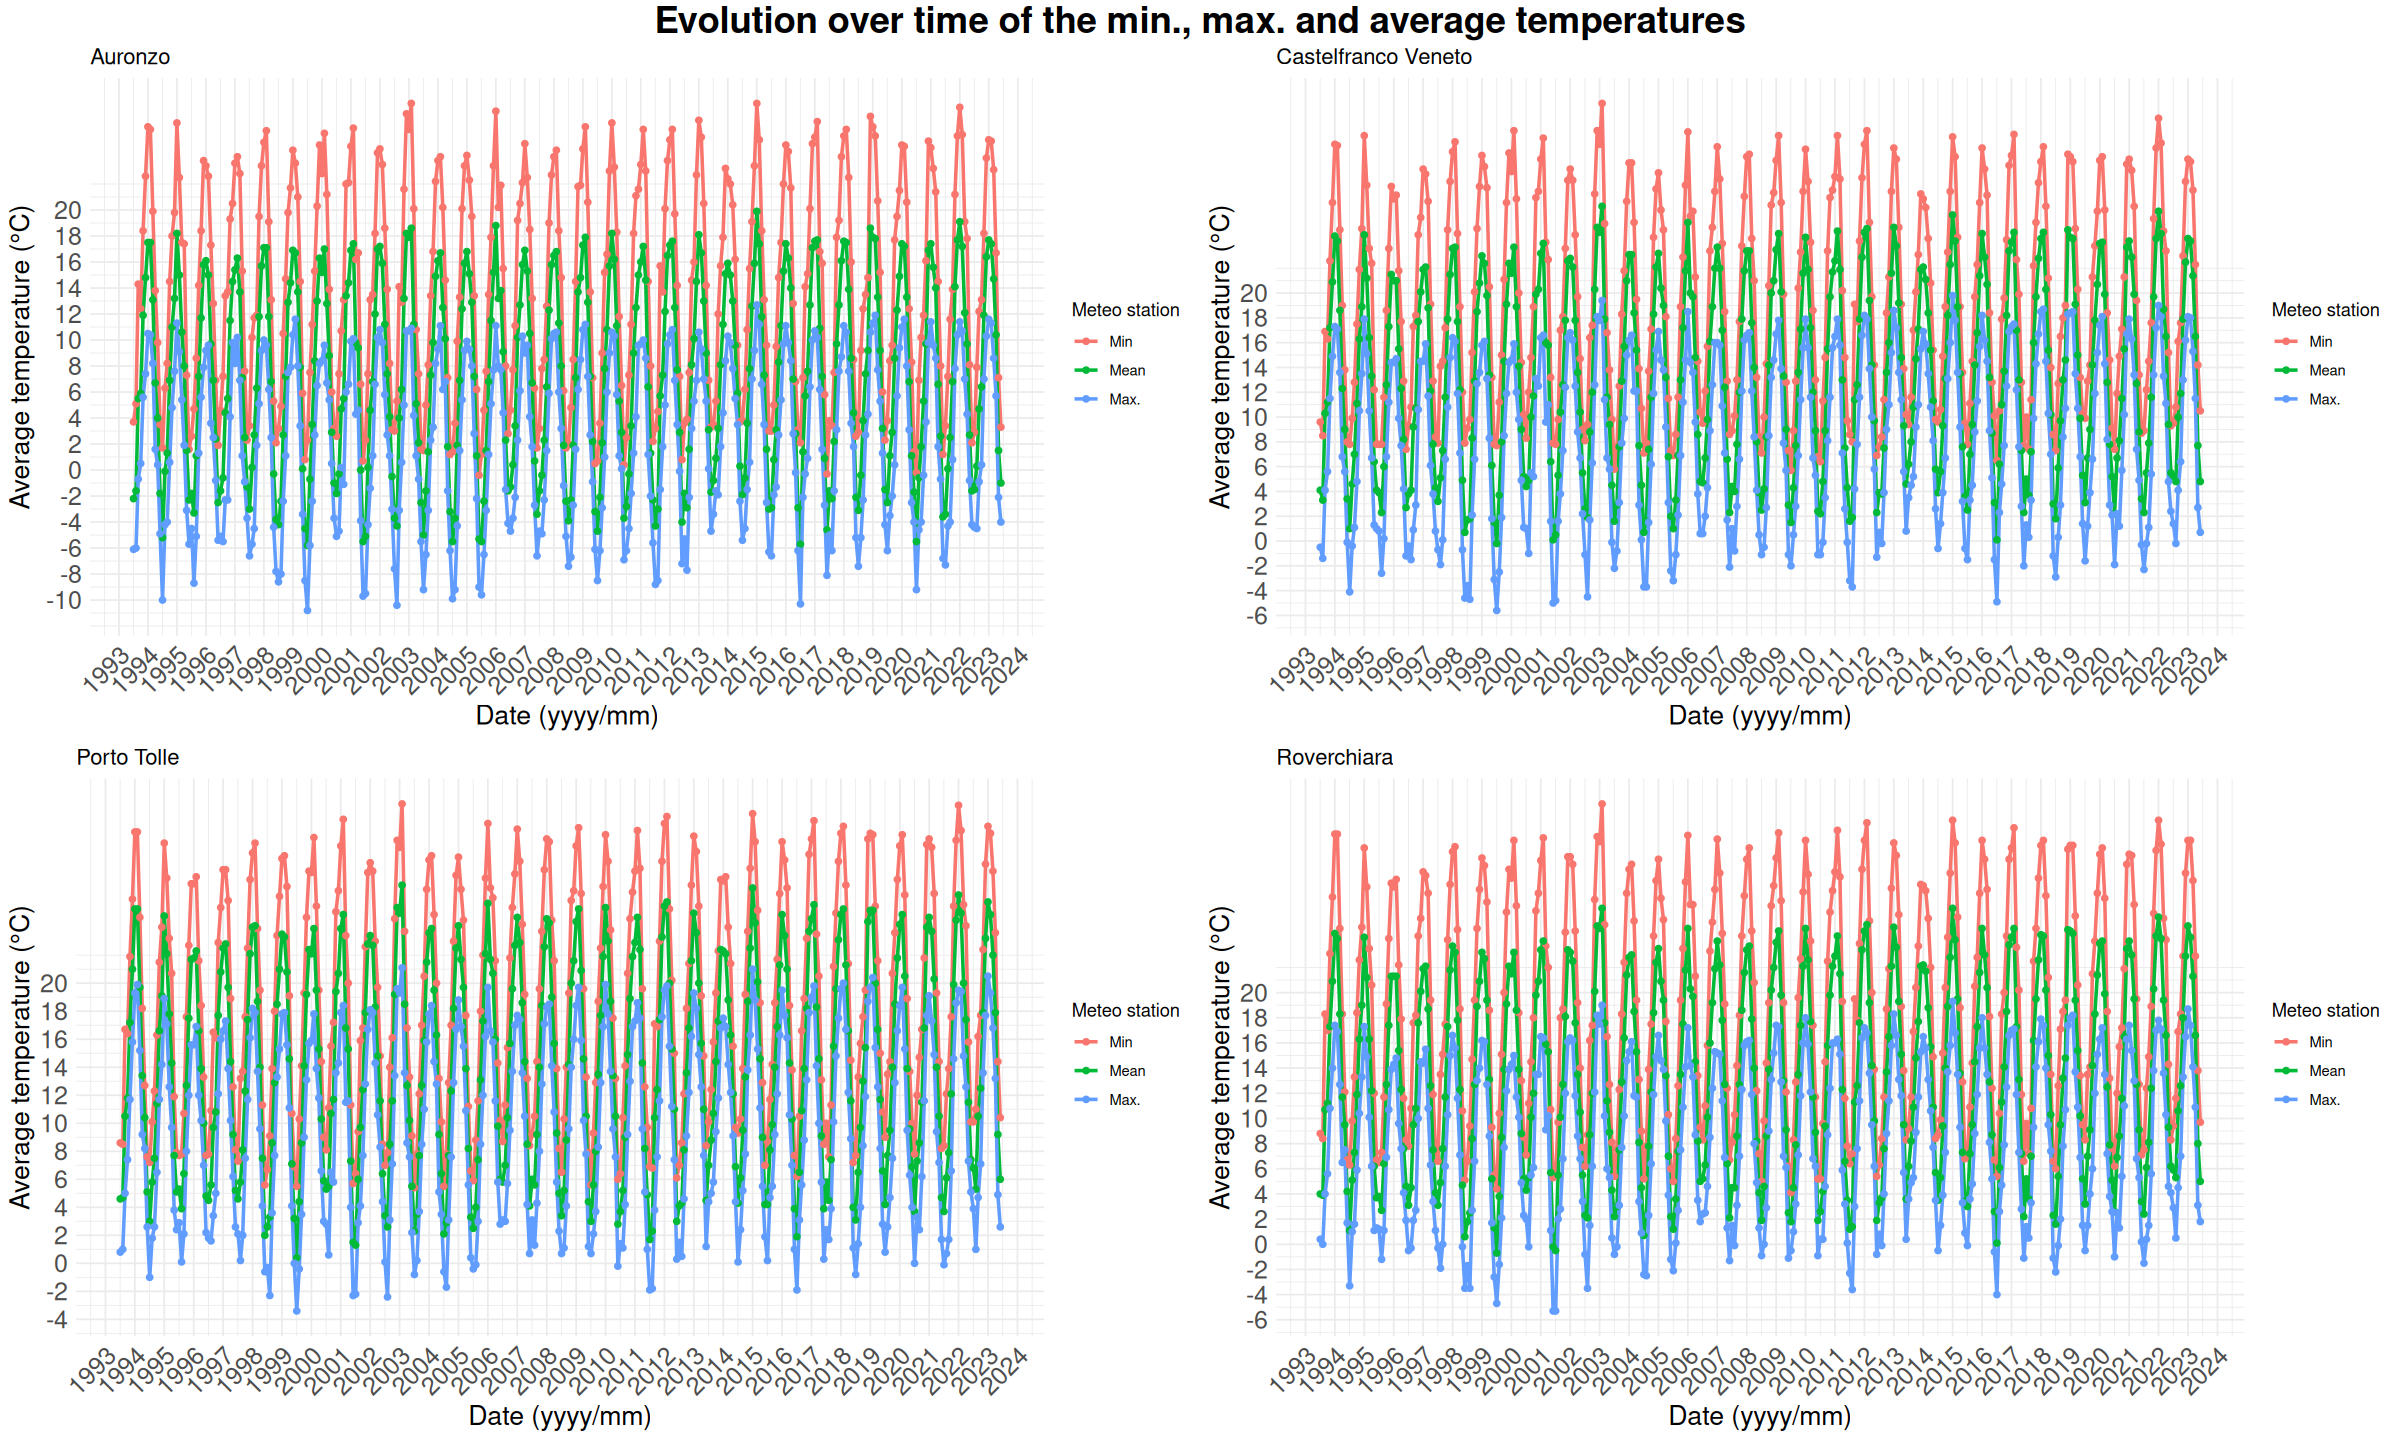

In [68]:
options(repr.plot.width = 20, repr.plot.height = 12) 

grid.arrange(adc_plot, cv_plot, pt_plot, rov_plot, ncol=2,nrow=2, top = textGrob('Evolution over time of the min., max. and average temperatures', 
                gp = gpar(fontsize = 22, fontface = "bold", col = "black")))
